# 포트폴리오 수익률 10개

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from pykrx import stock
from pykrx import bond
import warnings
warnings.filterwarnings('ignore')


In [2]:
코스피재무제표 = pd.read_csv('./코스피재무제표0505.csv')
전체종목코스피시가총액 = pd.read_csv('./전체종목코스피시가총액.csv')

In [3]:
코스피재무제표

,날짜,종목코드,종목명,시장타입,account_id,재무요소,값
0,199612,1880,DL건설,K,3060,부채비율,5.79
1,199712,1880,DL건설,K,3060,부채비율,5.79
2,199812,1880,DL건설,K,3060,부채비율,6.09
3,199912,1880,DL건설,K,3060,부채비율,3.05
4,200012,1880,DL건설,K,3060,부채비율,2.39
...,...,...,...,...,...,...,...
514524,201712,3280,흥아해운,K,77777,실적보고발표일,20180315.00
514525,201812,3280,흥아해운,K,77777,실적보고발표일,20190321.00
514526,201912,3280,흥아해운,K,77777,실적보고발표일,20200409.00
514527,202012,3280,흥아해운,K,77777,실적보고발표일,20210318.00


# 종목코스 0채우기

In [4]:
코스피재무제표['종목코드'] = 코스피재무제표['종목코드'].astype(str)

In [5]:
코스피재무제표['종목코드'] = 코스피재무제표['종목코드'].str.zfill(6)

In [6]:
코스피재무제표['날짜'] = 코스피재무제표['날짜'].astype('str')

In [7]:
# 코스피재무제표['날짜'] = 코스피재무제표['날짜'].str.extract(r'(\d\d\d\d\d\d)')   #일 제거 연,월까지만

In [8]:
# 코스피재무제표 = 코스피재무제표[코스피재무제표['날짜'].str.contains(r'(\d\d\d\d12)')==True]
코스피재무제표    # 날짜 12월달 만 남기를바라며

,날짜,종목코드,종목명,시장타입,account_id,재무요소,값
0,199612,001880,DL건설,K,3060,부채비율,5.79
1,199712,001880,DL건설,K,3060,부채비율,5.79
2,199812,001880,DL건설,K,3060,부채비율,6.09
3,199912,001880,DL건설,K,3060,부채비율,3.05
4,200012,001880,DL건설,K,3060,부채비율,2.39
...,...,...,...,...,...,...,...
514524,201712,003280,흥아해운,K,77777,실적보고발표일,20180315.00
514525,201812,003280,흥아해운,K,77777,실적보고발표일,20190321.00
514526,201912,003280,흥아해운,K,77777,실적보고발표일,20200409.00
514527,202012,003280,흥아해운,K,77777,실적보고발표일,20210318.00


In [9]:
코스피재무제표['날짜'].unique()

array(['199612', '199712', '199812', '199912', '200012', '200112',
       '200212', '200312', '200412', '200512', '200612', '200712',
       '200812', '200912', '201012', '201112', '201212', '201312',
       '201412', '201512', '201612', '201712', '201812', '201912',
       '202012', '202112'], dtype=object)

In [10]:
전체종목코스피시가총액['종목코드'] = 전체종목코스피시가총액['종목코드'].astype(str)

In [11]:
전체종목코스피시가총액['종목코드'] = 전체종목코스피시가총액['종목코드'].str.zfill(6)

In [ ]:
전체종목코스피시가총액['Date'] = 전체종목코스피시가총액['Date'].astype(str)

In [ ]:
# 코스피재무제표['값'][(코스피재무제표['재무요소']=='실적보고발표일') & (코스피재무제표['값']==20130430)] = 11111111 # 쿠쿠홀딩스

In [ ]:
# 코스피재무제표.to_csv('코스피재무제표0505.csv',index=False)

In [ ]:
연도_list = ['200412','200512','200612','200712','200812','200912','201012','201112','201212','201312','201412','201512','201612','201712','201812','201912','202012','202112']

# 1.유동성함수
* 유동비율,당좌비율,유보율
* 유동비율>=200% "200%미만 0, 200%이상 1"
* 당좌비율>=100% "100%미만 0, 100%이상 1"
* 유보율 > 200% "200%이하 0, 200%초과 1"

In [60]:
def 유동성종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
        
        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>=3)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        당좌비율 = 당해연도[(당해연도['재무요소']=='당좌비율') & (당해연도['값']>=3)].sort_values('값',ascending=False)
        당좌비율리스트 = 당좌비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        자본유보율 = 당해연도[(당해연도['재무요소']=='자본유보율') & (당해연도['값']>=3)].sort_values('값',ascending=False)
        자본유보율리스트 = 자본유보율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1
        당좌비율리스트 = pd.DataFrame(index = 당좌비율리스트, columns = ['당좌비율리스트'])
        당좌비율리스트['당좌비율리스트'] = 1
        자본유보율리스트 = pd.DataFrame(index = 자본유보율리스트, columns = ['자본유보율리스트'])
        자본유보율리스트['자본유보율리스트'] = 1

        항목구하기 = pd.merge(유동비율리스트,당좌비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,자본유보율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = 항목구하기['유동비율리스트'] + 항목구하기['당좌비율리스트'] + 항목구하기['자본유보율리스트']
        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        종목선정완료 = 항목구하기[항목구하기['총점수']==3].index.tolist()
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로
    
    return 선정기업

In [16]:
선정기업 = 유동성종목선정함수(연도_list)

In [13]:
# 선정기업

# 2.레버리지종목선정함수
* 영업이익이자보상비율,구경상이익이자보상비율,법인세차감전순이익이자보상비율, 영업활동현금흐름이자보상비율,비유동자산장기적합율,부채비율
* 영업이익이자보상비율 "100%이하 0,100%초과 1"
* 구경상이익이자보상비율 "100%이하 0,100%초과 1"
* 법인세차감전순이익이자보상비율 "100%이하 0,100%초과 1"
* 영업활동현금흐름이자보상비율 "100%이하 0,100%초과 1"
* 비유동자산장기적합율 "60=<비유동장기적합률<150"
* 부채비율 "0<부채비율=<150%"

In [14]:
def 레버리지종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
    
        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        영업이익이자보상비율 = 당해연도[(당해연도['재무요소']=='영업이익이자보상비율') & (당해연도['값']>=0.4)].sort_values('값',ascending=False)
        영업이익이자보상비율리스트 = 영업이익이자보상비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        구경상이익이자보상비율 = 당해연도[(당해연도['재무요소']=='(구)경상이익이자보상비율') & (당해연도['값']>=0.4)].sort_values('값',ascending=False)
        구경상이익이자보상비율리스트 = 구경상이익이자보상비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        법인세차감전순이익이자보상비율 = 당해연도[(당해연도['재무요소']=='법인세차감전순이익이자보상비율') & (당해연도['값']>=0.4)].sort_values('값',ascending=False)
        법인세차감전순이익이자보상비율리스트 = 법인세차감전순이익이자보상비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        영업활동현금흐름이자보상비율 = 당해연도[(당해연도['재무요소']=='영업활동현금흐름이자보상비율') & (당해연도['값']>=0.4)].sort_values('값',ascending=False)
        영업활동현금흐름이자보상비율리스트 = 영업활동현금흐름이자보상비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        비유동자산장기적합율 = 당해연도[(당해연도['재무요소']=='비유동자산장기적합율') & (당해연도['값']>=0.25) & (당해연도['값']<=2)].sort_values('값',ascending=False)
        비유동자산장기적합율리스트 = 비유동자산장기적합율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') & (당해연도['값']>=0) & (당해연도['값']<2)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        영업이익이자보상비율리스트 = pd.DataFrame(index = 영업이익이자보상비율리스트, columns = ['영업이익이자보상비율리스트'])
        영업이익이자보상비율리스트['영업이익이자보상비율리스트'] = 1
        구경상이익이자보상비율리스트 = pd.DataFrame(index = 구경상이익이자보상비율리스트, columns = ['(구)경상이익이자보상비율리스트'])
        구경상이익이자보상비율리스트['(구)경상이익이자보상비율리스트'] = 1
        법인세차감전순이익이자보상비율리스트 = pd.DataFrame(index = 법인세차감전순이익이자보상비율리스트, columns = ['법인세차감전순이익이자보상비율리스트'])
        법인세차감전순이익이자보상비율리스트['법인세차감전순이익이자보상비율리스트'] = 1
        영업활동현금흐름이자보상비율리스트 = pd.DataFrame(index = 영업활동현금흐름이자보상비율리스트, columns = ['영업활동현금흐름이자보상비율리스트'])
        영업활동현금흐름이자보상비율리스트['영업활동현금흐름이자보상비율리스트'] = 1
        비유동자산장기적합율리스트 = pd.DataFrame(index = 비유동자산장기적합율리스트, columns = ['비유동자산장기적합율리스트'])
        비유동자산장기적합율리스트['비유동자산장기적합율리스트'] = 1
        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1

        항목구하기 = pd.merge(영업이익이자보상비율리스트,구경상이익이자보상비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,법인세차감전순이익이자보상비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,영업활동현금흐름이자보상비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,비유동자산장기적합율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,부채비율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['영업이익이자보상비율리스트'] + 항목구하기['(구)경상이익이자보상비율리스트']
                        + 항목구하기['법인세차감전순이익이자보상비율리스트'] + 항목구하기['영업활동현금흐름이자보상비율리스트']
                        + 항목구하기['비유동자산장기적합율리스트'] + 항목구하기['부채비율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        
        if len(항목구하기[항목구하기['총점수']==6].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==6].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()
            
#         elif len(항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)]) >=5 :
            
#             종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()
        # else:
        #     종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5) | (항목구하기['총점수']==4)].index.tolist()
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

In [19]:
레버리지종목선정함수(연도_list)

{'200412': {'대덕': '008060',
  '신세계 I&C': '035510',
  '자화전자': '033240',
  '농심': '004370',
  '한일홀딩스': '003300',
  '삼성SDI': '006400',
  '태원물산': '001420',
  'KT&G': '033780',
  '아모레G': '002790',
  'KISCO홀딩스': '001940',
  '한온시스템': '018880',
  '동서': '026960',
  '한국종합기술': '023350',
  '삼성전자': '005930',
  '에스원': '012750',
  '신세계건설': '034300',
  '그린케미칼': '083420',
  '퍼시스': '016800',
  '대한화섬': '003830',
  'KPX케미칼': '025000',
  '제일기획': '030000'},
 '200512': {'한국종합기술': '023350',
  'KTis': '058860',
  '한온시스템': '018880',
  '케이씨': '029460',
  '대덕': '008060',
  '신세계푸드': '031440',
  '보락': '002760',
  '진양화학': '051630',
  '아모레G': '002790',
  '롯데지주': '004990',
  '퍼시스': '016800',
  'NAVER': '035420',
  '롯데칠성': '005300',
  '동서': '026960',
  'KT&G': '033780',
  '에스원': '012750',
  'KPX케미칼': '025000',
  '엔씨소프트': '036570',
  '태원물산': '001420',
  '일성신약': '003120'},
 '200612': {'하나투어': '039130',
  '롯데칠성': '005300',
  '현대미포조선': '010620',
  '한국단자': '025540',
  '삼성에스디에스': '018260',
  'KPX케미칼': '025000',
  '신세계푸드': '03

# 3.성장성종목선정함수
* 매출액증가율,총자산증가율,순이익증가율,esp증가율

* 매출액증가율 "매출성장률<동종업계성장률,매출성장률>10%"
* 총자산증가율 "매출성장률<동종업계성장률,총자산증가율>5%"
* 순이익증가율 "순이익증가율>10%"
* esp증가율 "EPS성장률>10%"

In [33]:
def 성장성종목선정함수(연도_list):
    
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
        
        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        매출액증가율 = 당해연도[(당해연도['재무요소']=='매출액증가율') & (당해연도['값']>=0.1)].sort_values('값',ascending=False)
        매출액증가율리스트 = 매출액증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        총자산증가율 = 당해연도[(당해연도['재무요소']=='총자산증가율') & (당해연도['값']>0.1)].sort_values('값',ascending=False)
        총자산증가율리스트 = 총자산증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        순이익증가율 = 당해연도[(당해연도['재무요소']=='순이익증가율') & (당해연도['값']>=0.1)].sort_values('값',ascending=False)
        순이익증가율리스트 = 순이익증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        esp증가율 = 당해연도[(당해연도['재무요소']=='esp증가율') & (당해연도['값']>=10)].sort_values('값',ascending=False)
        esp증가율리스트 = esp증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        매출액증가율리스트 = pd.DataFrame(index = 매출액증가율리스트, columns = ['매출액증가율리스트'])
        매출액증가율리스트['매출액증가율리스트'] = 1
        총자산증가율리스트 = pd.DataFrame(index = 총자산증가율리스트, columns = ['총자산증가율리스트'])
        총자산증가율리스트['총자산증가율리스트'] = 1
        순이익증가율리스트 = pd.DataFrame(index = 순이익증가율리스트, columns = ['순이익증가율리스트'])
        순이익증가율리스트['순이익증가율리스트'] = 1
        esp증가율리스트 = pd.DataFrame(index = esp증가율리스트, columns = ['esp증가율리스트'])
        esp증가율리스트['esp증가율리스트'] = 1

        항목구하기 = pd.merge(매출액증가율리스트,총자산증가율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,순이익증가율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,esp증가율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['매출액증가율리스트'] + 항목구하기['총자산증가율리스트']
                        + 항목구하기['순이익증가율리스트'] + 항목구하기['esp증가율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        
        if len(항목구하기[항목구하기['총점수']==4].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==4].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==4) | (항목구하기['총점수']==3)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

In [21]:
성장성종목선정함수(연도_list)

{'200412': {'그린케미칼': '083420',
  '현대글로비스': '086280',
  '현대제철': '004020',
  'LG디스플레이': '034220',
  '한온시스템': '018880',
  '현대미포조선': '010620',
  'KISCO홀딩스': '001940',
  '오리온홀딩스': '001800',
  '동국제강': '001230',
  'POSCO홀딩스': '005490',
  'S-Oil': '010950',
  '한농화성': '011500',
  '한일철강': '002220',
  '코리아써키트': '007810',
  '동일산업': '004890',
  '자화전자': '033240',
  '현대모비스': '012330',
  'DL': '000210',
  '한미사이언스': '008930',
  'LG전자': '066570',
  '세아제강지주': '003030',
  'LG화학': '051910',
  'KTis': '058860',
  '금호건설': '002990',
  '서연': '007860',
  '한라홀딩스': '060980',
  '문배철강': '008420',
  '국도화학': '007690',
  '한국특강': '007280',
  '황금에스티': '032560',
  '엔씨소프트': '036570',
  '신세계': '004170',
  '부산주공': '005030',
  '화승코퍼레이션': '013520',
  '퍼시스': '016800',
  '디아이': '003160',
  '이구산업': '025820',
  '금호전기': '001210',
  '케이씨': '029460',
  '금강공업': '014280',
  '롯데쇼핑': '023530',
  '서울가스': '017390',
  '두산에너빌리티': '034020'},
 '200512': {'KG케미칼': '001390',
  '한섬': '020000',
  'KPX케미칼': '025000',
  '현대모비스': '012330',
  '제일기획':

# 4.활동성종목선정함수

* 재고자산회전율(재고자산회전율1),매출채권회전율,총자산회전율
* 재고자산회전율 "재고자산회전율>12"
* 매출채권회전율 "매출채권회전율>6"
* 총자산회전율 "총자산회전율 > 0.8"



In [41]:
def 활동성종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
    
        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        재고자산회전율 = 당해연도[(당해연도['재무요소']=='재고자산회전율1') & (당해연도['값']>14)].sort_values('값',ascending=False)
        재고자산회전율리스트 = 재고자산회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출채권회전율 = 당해연도[(당해연도['재무요소']=='매출채권회전율') & (당해연도['값']>6)].sort_values('값',ascending=False)
        매출채권회전율리스트 = 매출채권회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        총자산회전율 = 당해연도[(당해연도['재무요소']=='총자산회전율') & (당해연도['값']>0.8)].sort_values('값',ascending=False)
        총자산회전율리스트 = 총자산회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        재고자산회전율리스트 = pd.DataFrame(index = 재고자산회전율리스트, columns = ['재고자산회전율리스트'])
        재고자산회전율리스트['재고자산회전율리스트'] = 1
        매출채권회전율리스트 = pd.DataFrame(index = 매출채권회전율리스트, columns = ['매출채권회전율리스트'])
        매출채권회전율리스트['매출채권회전율리스트'] = 1
        총자산회전율리스트 = pd.DataFrame(index = 총자산회전율리스트, columns = ['총자산회전율리스트'])
        총자산회전율리스트['총자산회전율리스트'] = 1

        항목구하기 = pd.merge(재고자산회전율리스트,매출채권회전율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,총자산회전율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = 항목구하기['재고자산회전율리스트'] + 항목구하기['매출채권회전율리스트'] + 항목구하기['총자산회전율리스트']
        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        
        # 종목선정완료 = 항목구하기[항목구하기['총점수']==3].index.tolist()
        if len(항목구하기[항목구하기['총점수']==3].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==3].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==3) | (항목구하기['총점수']==2)].index.tolist()
    
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업


In [23]:
활동성종목선정함수(연도_list)

{'200412': {'LX인터내셔널': '001120',
  '신세계': '004170',
  '농심': '004370',
  '퍼시스': '016800',
  '진양화학': '051630',
  'SK네트웍스': '001740',
  '평화홀딩스': '010770',
  'GS글로벌': '001250',
  '오리온홀딩스': '001800',
  '흥아해운': '003280',
  '에스원': '012750',
  '한샘': '009240',
  '동방': '004140',
  '금호석유': '011780',
  '크라운해태홀딩스': '005740',
  '풀무원': '017810',
  '현대코퍼레이션': '011760',
  '신세계푸드': '031440',
  '삼성전자': '005930',
  '한화': '000880',
  '웅진': '016880',
  'CJ씨푸드': '011150',
  '삼양홀딩스': '000070',
  'NICE': '034310',
  '한익스프레스': '014130',
  '삼양식품': '003230',
  '천일고속': '000650',
  '포스코인터내셔널': '047050',
  'HMM': '011200',
  '롯데지주': '004990',
  '유수홀딩스': '000700',
  '대한해운': '005880'},
 '200512': {'한솔테크닉스': '004710',
  '풀무원': '017810',
  '아시아나항공': '020560',
  '흥아해운': '003280',
  'GS글로벌': '001250',
  '퍼시스': '016800',
  '동방': '004140',
  '현대코퍼레이션': '011760',
  '대교': '019680',
  '웅진': '016880',
  'LX인터내셔널': '001120',
  'SK네트웍스': '001740',
  '삼양식품': '003230',
  '에스원': '012750',
  '크라운해태홀딩스': '005740',
  '신세계': '004170',
 

# 5.수익성 종목선정함수

* ROE = 자기자본순이익율,ROA = 총자산이익율,ROS = 매출액순이익율,ROIC = 투하자본이익률
* 자기자본순이익율, "ROE>10%, 상위30%"
* ROA,"ROA>10%"
* 매출액순이익율, "순이익증가율>5%"
* 투하자본이익률,(경영자본영업이익율) ""ROIC>15%(찰리티안)"

In [48]:
def 수익성종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
    
        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        자기자본순이익율 = 당해연도[(당해연도['재무요소']=='자기자본순이익율') & (당해연도['값']>0.11)].sort_values('값',ascending=False)
        자기자본순이익율리스트 = 자기자본순이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        roa = 당해연도[(당해연도['재무요소']=='roa') & (당해연도['값']>5.4)].sort_values('값',ascending=False)
        roa리스트 = roa.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액순이익율 = 당해연도[(당해연도['재무요소']=='매출액순이익율') & (당해연도['값']>0.06)].sort_values('값',ascending=False)
        매출액순이익율리스트 = 매출액순이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        경영자본영업이익율 = 당해연도[(당해연도['재무요소']=='경영자본영업이익율') & (당해연도['값']>0.09)].sort_values('값',ascending=False)
        경영자본영업이익율리스트 = 경영자본영업이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        자기자본순이익율리스트 = pd.DataFrame(index = 자기자본순이익율리스트, columns = ['자기자본순이익율리스트'])
        자기자본순이익율리스트['자기자본순이익율리스트'] = 1
        roa리스트 = pd.DataFrame(index = roa리스트, columns = ['roa리스트'])
        roa리스트['roa리스트'] = 1
        매출액순이익율리스트 = pd.DataFrame(index = 매출액순이익율리스트, columns = ['매출액순이익율리스트'])
        매출액순이익율리스트['매출액순이익율리스트'] = 1
        경영자본영업이익율리스트 = pd.DataFrame(index = 경영자본영업이익율리스트, columns = ['경영자본영업이익율리스트'])
        경영자본영업이익율리스트['경영자본영업이익율리스트'] = 1

        항목구하기 = pd.merge(자기자본순이익율리스트,roa리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액순이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,경영자본영업이익율리스트,left_index=True, right_index=True,how='left')


        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['자기자본순이익율리스트'] + 항목구하기['roa리스트']
                        + 항목구하기['매출액순이익율리스트'] + 항목구하기['경영자본영업이익율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        
        # 종목선정완료 = 항목구하기[항목구하기['총점수']==4.0].index.tolist()
        if len(항목구하기[항목구하기['총점수']==4].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==4].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==4) | (항목구하기['총점수']==3)].index.tolist()
    
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

In [25]:
수익성종목선정함수(연도_list)

{'200412': {'한미사이언스': '008930',
  '엔씨소프트': '036570',
  '자화전자': '033240',
  'POSCO홀딩스': '005490',
  'SK텔레콤': '017670',
  'KISCO홀딩스': '001940',
  'KPX케미칼': '025000',
  '한섬': '020000',
  '동서': '026960',
  'KT&G': '033780',
  'DL': '000210',
  '금강공업': '014280',
  '광전자': '017900',
  '한온시스템': '018880',
  'NAVER': '035420',
  '디아이': '003160',
  '디와이': '013570',
  '아모레G': '002790',
  '농심': '004370',
  '신흥': '004080',
  '한국쉘석유': '002960',
  '유니드': '014830',
  '퍼시스': '016800',
  '대한해운': '005880',
  '현대제철': '004020',
  '삼성SDI': '006400',
  '에스원': '012750',
  '한일홀딩스': '003300',
  '동국제강': '001230',
  '현대미포조선': '010620',
  '한국특강': '007280',
  'SK': '034730',
  'HMM': '011200',
  '일성신약': '003120',
  '유수홀딩스': '000700',
  'LS ELECTRIC': '010120',
  'S-Oil': '010950',
  'SK하이닉스': '000660',
  '삼성출판사': '068290',
  '태경산업': '015890',
  '광주신세계': '037710',
  '한라홀딩스': '060980',
  'LG디스플레이': '034220',
  '동일산업': '004890',
  '황금에스티': '032560',
  '현대모비스': '012330',
  '삼성전자': '005930',
  '현대엘리베이': '017800',
  'KTis

# 6.시장가치 종목선정함수 만들기
* EPS=주당순이익,EPS>10%
* PSR=주가매출비율,PSR<=4%
* PER=주가수익비율,PER<10%
* PCR=영업현금흐름대비주가,0<PCR<10
* PBR=주가순자산가치,PBR>0
* EBITDA,EBITDA>4

In [53]:
def 시장가치종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
    
        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)

        eps = 당해연도[(당해연도['재무요소']=='eps') & (당해연도['값']>=10)].sort_values('값',ascending=False)
        eps리스트 = eps.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        PSR = 당해연도[(당해연도['재무요소']=='PSR') & (당해연도['값']<=5)].sort_values('값',ascending=False)
        psr리스트 = PSR.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        per = 당해연도[(당해연도['재무요소']=='per') & (당해연도['값']<11)].sort_values('값',ascending=False)
        per리스트 = per.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        pcr = 당해연도[(당해연도['재무요소']=='PCR') & (당해연도['값']<8)&(당해연도['값']>0)].sort_values('값',ascending=False)
        pcr리스트 = pcr.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        pbr = 당해연도[(당해연도['재무요소']=='pbr') & (당해연도['값']<1) & (당해연도['값']>0)].sort_values('값',ascending=False)
        pbr리스트 = pbr.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        EBITDA = 당해연도[(당해연도['재무요소']=='EBITDA') & (당해연도['값']>=5) ].sort_values('값',ascending=False)
        EBITDA리스트 = EBITDA.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        eps리스트 = pd.DataFrame(index = eps리스트, columns = ['eps리스트'])
        eps리스트['eps리스트'] = 1
        psr리스트 = pd.DataFrame(index = psr리스트, columns = ['psr리스트'])
        psr리스트['psr리스트'] = 1
        per리스트 = pd.DataFrame(index = per리스트, columns = ['per리스트'])
        per리스트['per리스트'] = 1
        pcr리스트 = pd.DataFrame(index = pcr리스트, columns = ['pcr리스트'])
        pcr리스트['pcr리스트'] = 1
        pbr리스트 = pd.DataFrame(index = pbr리스트, columns = ['pbr리스트'])
        pbr리스트['pbr리스트'] = 1
        EBITDA리스트 = pd.DataFrame(index = EBITDA리스트, columns = ['EBITDA리스트'])
        EBITDA리스트['EBITDA리스트'] = 1

        항목구하기 = pd.merge(eps리스트,psr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,per리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,pcr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,pbr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,EBITDA리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['eps리스트'] + 항목구하기['psr리스트']
                        + 항목구하기['per리스트'] + 항목구하기['pcr리스트']
                        + 항목구하기['pbr리스트'] + 항목구하기['EBITDA리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        # 종목선정완료 = 항목구하기[항목구하기['총점수']==6.0].index.tolist()
        
        if len(항목구하기[항목구하기['총점수']==6].index.tolist()) >=5 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==6].index.tolist()
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

In [54]:
시장가치종목선정함수(연도_list)

{'200412': {'한국주강': '025890',
  '동국제강': '001230',
  '신세계건설': '034300',
  '화신': '010690',
  '대창단조': '015230',
  '대한제당': '001790',
  '한국전력': '015760',
  '일신방직': '003200',
  '동방': '004140',
  '금호석유': '011780',
  '삼영전자': '005680',
  '효성': '004800',
  '일성신약': '003120',
  '삼성출판사': '068290',
  '서울가스': '017390',
  '모토닉': '009680',
  '고려아연': '010130',
  '경농': '002100',
  '성안': '011300',
  '한국프랜지': '010100',
  '화승인더': '006060',
  '조광피혁': '004700',
  '동부건설': '005960',
  '한화': '000880',
  '화천기공': '000850',
  '현대백화점': '069960',
  '대원강업': '000430',
  '금강공업': '014280',
  '보해양조': '000890',
  '세종공업': '033530',
  '대한화섬': '003830',
  '한국석유': '004090',
  'LG': '003550',
  '광전자': '017900',
  '고려제강': '002240',
  '넥센': '005720',
  '조선내화': '000480',
  '신흥': '004080',
  'SKC': '011790',
  '태광산업': '003240',
  '영풍': '000670',
  '코리아써키트': '007810',
  '대한해운': '005880',
  '대림통상': '006570',
  '태원물산': '001420',
  '세아홀딩스': '058650',
  '경인양행': '012610',
  '농심홀딩스': '072710',
  '흥아해운': '003280',
  '삼화콘덴서': '001820',
  '동

# 7.그레이엄
* per, 배당수익률, pbr, 부채비율,유동비율

In [62]:
def 그레이엄종목선정함수(연도_list):
    
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
        
        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)


        per = 당해연도[(당해연도['재무요소']=='per') & (당해연도['값']>0) & (당해연도['값']<7.4)].sort_values('값',ascending=False)
        per리스트 = per.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        현금배당수익률 = 당해연도[(당해연도['재무요소']=='현금배당수익률') & (당해연도['값']>=1.5)].sort_values('값',ascending=False)
        현금배당수익률리스트 = 현금배당수익률.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        pbr = 당해연도[(당해연도['재무요소']=='pbr') & (당해연도['값']<1) & (당해연도['값']>0)].sort_values('값',ascending=False)
        pbr리스트 = pbr.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') &(당해연도['값']>=0)& (당해연도['값']<=1.5)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>=2)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()


        per리스트 = pd.DataFrame(index = per리스트, columns = ['per리스트'])
        per리스트['per리스트'] = 1
        현금배당수익률리스트 = pd.DataFrame(index = 현금배당수익률리스트, columns = ['현금배당수익률리스트'])
        현금배당수익률리스트['현금배당수익률리스트'] = 1
        pbr리스트 = pd.DataFrame(index = pbr리스트, columns = ['pbr리스트'])
        pbr리스트['pbr리스트'] = 1
        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1
        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1

        항목구하기 = pd.merge(per리스트,현금배당수익률리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,pbr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,부채비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,유동비율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['per리스트'] + 항목구하기['현금배당수익률리스트']
                        + 항목구하기['pbr리스트'] + 항목구하기['부채비율리스트']
                        + 항목구하기['유동비율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        # 종목선정완료 = 항목구하기.index.tolist()
        
        if len(항목구하기[항목구하기['총점수']==5].index.tolist()) >=10 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==5].index.tolist()
        
        elif len(항목구하기[(항목구하기['총점수']==5) | (항목구하기['총점수']==4)]) >=10 :
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==5) | (항목구하기['총점수']==4)].index.tolist()
            
        elif len(항목구하기[(항목구하기['총점수']==5) | (항목구하기['총점수']==4) | (항목구하기['총점수']==3)]) >=10 :
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==5) | (항목구하기['총점수']==4) | (항목구하기['총점수']==3)].index.tolist()
        
        else:
            종목선정완료 = 항목구하기[(항목구하기['총점수']==5) | (항목구하기['총점수']==4) | (항목구하기['총점수']==3)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

In [33]:
그레이엄종목선정함수(연도_list)

{'200412': {'동남합성': '023450',
  '일성신약': '003120',
  '한국쉘석유': '002960',
  '코리아써키트': '007810',
  '삼영무역': '002810',
  '계룡건설': '013580',
  '한섬': '020000',
  '태원물산': '001420',
  '금강공업': '014280',
  '삼영전자': '005680',
  '삼성출판사': '068290',
  '모토닉': '009680',
  '국도화학': '007690',
  '한일철강': '002220',
  '문배철강': '008420',
  '삼양통상': '002170',
  '세종공업': '033530',
  '동원F&B': '049770',
  '영풍제지': '006740'},
 '200512': {'대한방직': '001070',
  '한국주강': '025890',
  '모토닉': '009680',
  '동일산업': '004890',
  '삼영무역': '002810',
  '일신방직': '003200',
  '조선내화': '000480',
  '세아홀딩스': '058650',
  '한국공항': '005430',
  '휴스틸': '005010',
  '동국제강': '001230',
  '일성신약': '003120',
  '넥센': '005720',
  '조일알미늄': '018470',
  '화천기공': '000850',
  '계룡건설': '013580',
  '대한유화': '006650',
  '금강공업': '014280',
  'BYC': '001460',
  '삼부토건': '001470'},
 '200612': {'모토닉': '009680',
  '화천기공': '000850',
  '동일산업': '004890',
  '한국공항': '005430',
  '영풍제지': '006740',
  '유니드': '014830',
  '한국주강': '025890',
  '삼성공조': '006660',
  '광명전기': '017040',
  '대양금속': '

# 8.버핏

* 부채비율,유동비율,ROE(자기자본순이익율),영업이익률(매출액영업이익율),재고자산회전율,매출채권회전율,순유동자산(X)

In [69]:
def 버핏종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도
    
        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)


        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') &(당해연도['값']>0)& (당해연도['값']<=1.5)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>1.7)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        자기자본순이익율 = 당해연도[(당해연도['재무요소']=='자기자본순이익율') & (당해연도['값']>=0.10)].sort_values('값',ascending=False)
        자기자본순이익율리스트 = 자기자본순이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액영업이익율 = 당해연도[(당해연도['재무요소']=='매출액영업이익율') & (당해연도['값']>=6.5)].sort_values('값',ascending=False)
        매출액영업이익율리스트 = 매출액영업이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        재고자산회전율 = 당해연도[(당해연도['재무요소']=='재고자산회전율1') & (당해연도['값']>6.5)].sort_values('값',ascending=False)
        재고자산회전율리스트 = 재고자산회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출채권회전율 = 당해연도[(당해연도['재무요소']=='매출채권회전율') &(당해연도['값']>5)].sort_values('값',ascending=False)
        매출채권회전율리스트 = 매출채권회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        esp증가율 = 당해연도[(당해연도['재무요소']=='esp증가율') &(당해연도['값']>7.5)].sort_values('값',ascending=False)
        esp증가율리스트 = esp증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()



        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1
        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1
        자기자본순이익율리스트 = pd.DataFrame(index = 자기자본순이익율리스트, columns = ['자기자본순이익율리스트'])
        자기자본순이익율리스트['자기자본순이익율리스트'] = 1
        매출액영업이익율리스트 = pd.DataFrame(index = 매출액영업이익율리스트, columns = ['매출액영업이익율리스트'])
        매출액영업이익율리스트['매출액영업이익율리스트'] = 1
        재고자산회전율리스트 = pd.DataFrame(index = 재고자산회전율리스트, columns = ['재고자산회전율리스트'])
        재고자산회전율리스트['재고자산회전율리스트'] = 1
        매출채권회전율리스트 = pd.DataFrame(index = 매출채권회전율리스트, columns = ['매출채권회전율리스트'])
        매출채권회전율리스트['매출채권회전율리스트'] = 1
        esp증가율리스트 = pd.DataFrame(index = esp증가율리스트, columns = ['esp증가율리스트'])
        esp증가율리스트['esp증가율리스트'] = 1

        항목구하기 = pd.merge(부채비율리스트,유동비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,자기자본순이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액영업이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,재고자산회전율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출채권회전율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,esp증가율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['부채비율리스트'] + 항목구하기['유동비율리스트']
                        + 항목구하기['자기자본순이익율리스트'] + 항목구하기['매출액영업이익율리스트']
                        + 항목구하기['재고자산회전율리스트'] + 항목구하기['매출채권회전율리스트'] + 항목구하기['esp증가율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        # 종목선정완료 = 항목구하기.index.tolist()
        
        if len(항목구하기[항목구하기['총점수']==7].index.tolist()) >10 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==7].index.tolist()
            
        elif  len(항목구하기[(항목구하기['총점수']==7) | (항목구하기['총점수']==6)].index.tolist()) >=10 :
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==7) | (항목구하기['총점수']==6)].index.tolist()
            
        else:
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==7) | (항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

In [37]:
버핏종목선정함수(연도_list)

{'200412': {'엔씨소프트': '036570',
  'POSCO홀딩스': '005490',
  '코리아써키트': '007810',
  '퍼시스': '016800',
  'KISCO홀딩스': '001940',
  '한국쉘석유': '002960',
  '케이씨': '029460',
  '아모레G': '002790',
  '한미사이언스': '008930',
  '삼성에스디에스': '018260',
  '한온시스템': '018880',
  'LG디스플레이': '034220',
  '삼성전자': '005930',
  '삼성SDI': '006400',
  'NICE': '034310',
  '농심': '004370',
  '디와이': '013570',
  '유니드': '014830',
  '삼익THK': '004380',
  'KTis': '058860',
  '한일철강': '002220',
  '현대제철': '004020',
  '계룡건설': '013580',
  '모토닉': '009680',
  '이수화학': '005950',
  '그린케미칼': '083420',
  '한일홀딩스': '003300',
  '한국공항': '005430',
  'SK하이닉스': '000660',
  '금강공업': '014280',
  '대덕': '008060',
  'S-Oil': '010950',
  '고려아연': '010130',
  '동서': '026960',
  '현대모비스': '012330',
  '에스원': '012750',
  '동일산업': '004890',
  'TCC스틸': '002710',
  '영원무역홀딩스': '009970',
  '대현': '016090',
  '신라교역': '004970'},
 '200512': {'동서': '026960',
  '모토닉': '009680',
  '아모레G': '002790',
  '퍼시스': '016800',
  '에스원': '012750',
  '신세계건설': '034300',
  'POSCO홀딩스': '005490',


# 9.린치

* per, 부채비율,유동비율,영업이익률,pcr,매출성장률

In [76]:
def 린치종목선정함수(연도_list):
    
    선정기업 = {}
    for 연도 in 연도_list:
    
        날짜 = 연도

        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(연도)]
        당해연도['값'] = 당해연도['값'].astype(float)


        per = 당해연도[(당해연도['재무요소']=='per') &(당해연도['값']>0)& (당해연도['값']<=10)].sort_values('값',ascending=False)
        per리스트 = per.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>=2)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') & (당해연도['값']>0)& (당해연도['값']<=1.5)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액영업이익율 = 당해연도[(당해연도['재무요소']=='매출액영업이익율') & (당해연도['값']>=8)].sort_values('값',ascending=False)
        매출액영업이익율리스트 = 매출액영업이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        PCR = 당해연도[(당해연도['재무요소']=='PCR') & (당해연도['값']>0) & (당해연도['값']<10)].sort_values('값',ascending=False)
        PCR리스트 = PCR.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액증가율 = 당해연도[(당해연도['재무요소']=='매출액증가율') &(당해연도['값']>0.06)].sort_values('값',ascending=False)
        매출액증가율리스트 = 매출액증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()



        per리스트 = pd.DataFrame(index = per리스트, columns = ['per리스트'])
        per리스트['per리스트'] = 1
        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1
        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1
        매출액영업이익율리스트 = pd.DataFrame(index = 매출액영업이익율리스트, columns = ['매출액영업이익율리스트'])
        매출액영업이익율리스트['매출액영업이익율리스트'] = 1
        PCR리스트 = pd.DataFrame(index = PCR리스트, columns = ['PCR리스트'])
        PCR리스트['PCR리스트'] = 1
        매출액증가율리스트 = pd.DataFrame(index = 매출액증가율리스트, columns = ['매출액증가율리스트'])
        매출액증가율리스트['매출액증가율리스트'] = 1

        항목구하기 = pd.merge(per리스트,유동비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,부채비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액영업이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,PCR리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액증가율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['per리스트'] + 항목구하기['유동비율리스트']
                        + 항목구하기['부채비율리스트'] + 항목구하기['매출액영업이익율리스트']
                        + 항목구하기['PCR리스트'] + 항목구하기['매출액증가율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
        # 종목선정완료 = 항목구하기.index.tolist()
        
        
        if len(항목구하기[항목구하기['총점수']==6].index.tolist()) >=10 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==6].index.tolist()
            
        elif  len(항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()) >=10 :
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5)].index.tolist()
            
        else:
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==6) | (항목구하기['총점수']==5) | (항목구하기['총점수']==4)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

In [40]:
린치종목선정함수(연도_list)

{'200412': {'한일철강': '002220',
  '한국공항': '005430',
  '퍼시스': '016800',
  '코리아써키트': '007810',
  '금강공업': '014280',
  '한국쉘석유': '002960',
  '태원물산': '001420',
  '동원F&B': '049770',
  '동남합성': '023450',
  '일신방직': '003200'},
 '200512': {'한국주강': '025890',
  '계룡건설': '013580',
  '일성신약': '003120',
  '국도화학': '007690',
  '퍼시스': '016800',
  '모토닉': '009680',
  '한섬': '020000',
  '영풍제지': '006740',
  '코리아써키트': '007810',
  '영풍': '000670',
  '대현': '016090',
  '동남합성': '023450',
  '한농화성': '011500',
  '신세계건설': '034300',
  'LG화학': '051910',
  '백산': '035150',
  '넥센': '005720',
  '일신방직': '003200',
  '인지컨트롤스': '023800',
  '조선내화': '000480',
  '화천기공': '000850',
  '금강공업': '014280',
  '세아홀딩스': '058650'},
 '200612': {'계룡건설': '013580',
  '한국쉘석유': '002960',
  '유성기업': '002920',
  '새론오토모티브': '075180',
  '고려아연': '010130',
  '모토닉': '009680',
  '삼양통상': '002170',
  '영풍제지': '006740',
  '동일산업': '004890',
  '태원물산': '001420',
  '금호전기': '001210',
  '삼성공조': '006660',
  '영풍': '000670',
  '조선내화': '000480',
  '현대제철': '004020',
  '화천기공': 

# 10.삼대투자가종합판 

1. 0<per<(18*04)
2. 배당수익률>0   (AAA등급 회사채 수익률* 0.67)
3. 0<pbr<0.65
4. 0<부채비율<=150%
5. 유동비율>200%
6. roe>10%
7. 영업이익률>10%
8. 재고자산회전율 >12
9. 매출채권회전율>6
10. eps성장률 > 10%
11. 0<pcr<10
12. 매출성장률>10%

In [83]:
def 삼대투자종목선정함수(연도_list):
    # 연도_list = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
    선정기업 = {}
    for 연도 in 연도_list:
        
        날짜 = 연도

        당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(날짜)]
        당해연도['값'] = 당해연도['값'].astype(float)


        per = 당해연도[(당해연도['재무요소']=='per') &(당해연도['값']>0)& (당해연도['값']<=10)].sort_values('값',ascending=False)
        per리스트 = per.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>=2)].sort_values('값',ascending=False)
        유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') & (당해연도['값']>0)& (당해연도['값']<=2)].sort_values('값',ascending=False)
        부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액영업이익율 = 당해연도[(당해연도['재무요소']=='매출액영업이익율') & (당해연도['값']>=5)].sort_values('값',ascending=False)
        매출액영업이익율리스트 = 매출액영업이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        PCR = 당해연도[(당해연도['재무요소']=='PCR') & (당해연도['값']>0) & (당해연도['값']<10)].sort_values('값',ascending=False)
        PCR리스트 = PCR.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출액증가율 = 당해연도[(당해연도['재무요소']=='매출액증가율') &(당해연도['값']>0.16)].sort_values('값',ascending=False)
        매출액증가율리스트 = 매출액증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        재고자산회전율 = 당해연도[(당해연도['재무요소']=='재고자산회전율1') & (당해연도['값']>12)].sort_values('값',ascending=False)
        재고자산회전율리스트 = 재고자산회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        현금배당수익률 = 당해연도[(당해연도['재무요소']=='현금배당수익률') & (당해연도['값']>=1.5)].sort_values('값',ascending=False)
        현금배당수익률리스트 = 현금배당수익률.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        pbr = 당해연도[(당해연도['재무요소']=='pbr') & (당해연도['값']<1) & (당해연도['값']>0)].sort_values('값',ascending=False)
        pbr리스트 = pbr.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        자기자본순이익율 = 당해연도[(당해연도['재무요소']=='자기자본순이익율') & (당해연도['값']>=0.11)].sort_values('값',ascending=False)
        자기자본순이익율리스트 = 자기자본순이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        esp증가율 = 당해연도[(당해연도['재무요소']=='esp증가율') &(당해연도['값']>8)].sort_values('값',ascending=False)
        esp증가율리스트 = esp증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
        매출채권회전율 = 당해연도[(당해연도['재무요소']=='매출채권회전율') &(당해연도['값']>6)].sort_values('값',ascending=False)
        매출채권회전율리스트 = 매출채권회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()

        per리스트 = pd.DataFrame(index = per리스트, columns = ['per리스트'])
        per리스트['per리스트'] = 1
        유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
        유동비율리스트['유동비율리스트'] = 1
        부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
        부채비율리스트['부채비율리스트'] = 1
        매출액영업이익율리스트 = pd.DataFrame(index = 매출액영업이익율리스트, columns = ['매출액영업이익율리스트'])
        매출액영업이익율리스트['매출액영업이익율리스트'] = 1
        PCR리스트 = pd.DataFrame(index = PCR리스트, columns = ['PCR리스트'])
        PCR리스트['PCR리스트'] = 1
        매출액증가율리스트 = pd.DataFrame(index = 매출액증가율리스트, columns = ['매출액증가율리스트'])
        매출액증가율리스트['매출액증가율리스트'] = 1
        재고자산회전율리스트 = pd.DataFrame(index = 재고자산회전율리스트, columns = ['재고자산회전율리스트'])
        재고자산회전율리스트['재고자산회전율리스트'] = 1
        현금배당수익률리스트 = pd.DataFrame(index = 현금배당수익률리스트, columns = ['현금배당수익률리스트'])
        현금배당수익률리스트['현금배당수익률리스트'] = 1
        pbr리스트 = pd.DataFrame(index = pbr리스트, columns = ['pbr리스트'])
        pbr리스트['pbr리스트'] = 1
        자기자본순이익율리스트 = pd.DataFrame(index = 자기자본순이익율리스트, columns = ['자기자본순이익율리스트'])
        자기자본순이익율리스트['자기자본순이익율리스트'] = 1
        esp증가율리스트 = pd.DataFrame(index = esp증가율리스트, columns = ['esp증가율리스트'])
        esp증가율리스트['esp증가율리스트'] = 1
        매출채권회전율리스트 = pd.DataFrame(index = 매출채권회전율리스트, columns = ['매출채권회전율리스트'])
        매출채권회전율리스트['매출채권회전율리스트'] = 1

        항목구하기 = pd.merge(per리스트,유동비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,부채비율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액영업이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,PCR리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출액증가율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,재고자산회전율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,현금배당수익률리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,pbr리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,자기자본순이익율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,esp증가율리스트,left_index=True, right_index=True,how='left')
        항목구하기 = pd.merge(항목구하기,매출채권회전율리스트,left_index=True, right_index=True,how='left')

        항목구하기 = 항목구하기.fillna(0)

        항목구하기['총점수'] = (항목구하기['per리스트'] + 항목구하기['유동비율리스트']
                        + 항목구하기['부채비율리스트'] + 항목구하기['매출액영업이익율리스트']
                        + 항목구하기['PCR리스트'] + 항목구하기['매출액증가율리스트']
                        + 항목구하기['재고자산회전율리스트'] + 항목구하기['현금배당수익률리스트']
                        + 항목구하기['pbr리스트'] + 항목구하기['자기자본순이익율리스트']
                        + 항목구하기['esp증가율리스트'] + 항목구하기['매출채권회전율리스트'])

        항목구하기 = 항목구하기.sort_values('총점수',ascending=False)   #항목구하기도 나중에 데이터프레임 연도별로 컨캣해야함!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        # 종목선정완료 = 항목구하기.index.tolist()

        if len(항목구하기[항목구하기['총점수']==9].index.tolist()) >=10 :
            
            종목선정완료 = 항목구하기[항목구하기['총점수']==9].index.tolist()
            
        elif  len(항목구하기[(항목구하기['총점수']==9) | (항목구하기['총점수']==8)].index.tolist()) >=10 :
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==9) | (항목구하기['총점수']==8)].index.tolist()
        
        elif  len(항목구하기[(항목구하기['총점수']==9) | (항목구하기['총점수']==8)  | (항목구하기['총점수']==7)].index.tolist()) >=10 :
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==9) | (항목구하기['총점수']==8) | (항목구하기['총점수']==7)].index.tolist()
            
        else:
            
            종목선정완료 = 항목구하기[(항목구하기['총점수']==9) | (항목구하기['총점수']==8) | (항목구하기['총점수']==7) | (항목구하기['총점수']==6)].index.tolist()
        
        
        # 종목선정완료된 종목코드 뽑아내기
        종목코드_list = []
        for i,col in enumerate(종목선정완료):
            종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
        종목코드_list = sum(종목코드_list,[])

        #종목코드_list넣기
        기업들 = (dict(zip(종목선정완료, 종목코드_list)))
        선정기업[날짜] = 기업들
        # 선정기업연도 = 선정기업.columns.tolist()   # 여기서 날짜로 변환해야함 단일값으로

    return 선정기업

In [42]:
삼대투자종목선정함수(연도_list)

{'200412': {'퍼시스': '016800',
  '삼성전자': '005930',
  '동남합성': '023450',
  '삼성SDI': '006400',
  '서울가스': '017390',
  '코리아써키트': '007810',
  '농심홀딩스': '072710',
  '동국제강': '001230',
  '태원물산': '001420',
  '한일철강': '002220',
  '고려아연': '010130',
  '대한해운': '005880',
  '한국쉘석유': '002960'},
 '200512': {'모토닉': '009680',
  '퍼시스': '016800',
  'GS': '078930',
  '대한방직': '001070',
  '한국공항': '005430',
  '계룡건설': '013580',
  '일신방직': '003200',
  '대창단조': '015230',
  '한국주강': '025890',
  '한섬': '020000',
  '국도화학': '007690',
  '인지컨트롤스': '023800'},
 '200612': {'대한유화': '006650',
  '대한해운': '005880',
  '고려아연': '010130',
  '진양화학': '051630',
  '경농': '002100',
  '세종공업': '033530',
  '서울가스': '017390',
  '태원물산': '001420',
  '신대양제지': '016590',
  '국도화학': '007690',
  '대원전선': '006340',
  '영풍': '000670',
  '풀무원': '017810',
  '금호전기': '001210',
  '한국공항': '005430',
  '유니드': '014830'},
 '200712': {'대한해운': '005880',
  '퍼시스': '016800',
  '신원': '009270',
  '광주신세계': '037710',
  '디아이': '003160',
  '한국주강': '025890',
  '대한유화': '006650',
  '한국

# 포트폴리오 수익률 함수

In [43]:
연도_list = ['200412','200512','200612','200712','200812','200912','201012','201112','201212','201312','201412','201512','201612','201712','201812','201912','202012','202112']

In [44]:
list(선정기업)

['200412',
 '200512',
 '200612',
 '200712',
 '200812',
 '200912',
 '201012',
 '201112',
 '201212',
 '201312',
 '201412',
 '201512',
 '201612',
 '201712',
 '201812',
 '201912',
 '202012',
 '202112']

In [84]:
import datetime as dt
from pykrx import stock
from pykrx import bond


def 연간수익률(선정기업):   #종목코드_list 는 연도를 넣어서 해당연도로 선정된 종목코드_list입니다.
    연간수익률 = pd.DataFrame()
    연간수익률_list = []
    포트폴리오종목명_list = []
    시작날짜_list = []
    매도날짜_list = []
    
    #실적보고발표일 값 불러오기
    실적보고발표일 = 코스피재무제표[코스피재무제표['재무요소']=='실적보고발표일']
    실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111  # 널값채워넣기최소값으로
    실적보고발표일['값'] = 실적보고발표일['값'].astype(int)
    실적보고발표일['값'] = 실적보고발표일['값'].astype(str)

        
    for 연도순서,연도날짜 in enumerate(list(선정기업)):
        
        종목코드_list = list(선정기업[연도날짜].values())
        
        # 날짜,종목코드_list,항목구하기 를 전의 함수에서 불러옵니다.
        날짜 =연도날짜
        # 날짜
        
    
        날짜 = dt.datetime.strptime(날짜,"%Y%m")

        Y = dt.datetime.strftime(날짜,'%Y')    #201212
        if (int(dt.datetime.strftime(날짜,'%m'))==12):
            Y = int(Y)+1
        M = '04'
        D = '01'
        
        매수날짜 = str(Y) + M + D


        종목시가총액 = stock.get_market_cap(매수날짜)  #
        종목시가총액 = 종목시가총액.rename_axis('종목코드').reset_index()
        #연도와,재무요소에 맞춰서 선정된종목들중 시가총액을 기준으로 상위 5개를 발표일일 다음날에 맞춰서 불러오기
        #매수기준날짜 나중에 사용해야함!!!!!!!!!!!!!!!!!!!!!!!
        종목가격 = pd.DataFrame()
        for 종목 in 종목코드_list:
            
            종목행 = 종목시가총액[종목시가총액['종목코드']==종목]
            종목가격 = pd.concat([종목가격,종목행],axis=0)
        포트폴리오종목코드 = 종목가격.sort_values('시가총액',ascending=False)[:10]['종목코드'].tolist() #열개
        #포트폴리오 수익률 구하기전 최종 종목코드,이름,데이터프레임
        포트폴리오종목명 = []
        for ticker in 포트폴리오종목코드:
            
            포트폴리오 = stock.get_market_ticker_name(ticker)
            포트폴리오종목명.append(포트폴리오)
       
        # 포트폴리오종목명



        #동일가중방식 수익률 산정
        가중치 = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])  # 10종목이니까 자금의 10%씩

        #시작날짜와 1년뒤 날짜 설정 이것도 주식거래날에 맞춰서 다음에 함수수정해야해!!!!!!!!!!!!!!!!!!!!!!
        시작날짜 = 매수날짜 #매수기준날짜에서 다음주식거래날짜
        #시작날짜에서 1년뒤 거래날짜    #3월1일매도로 확정기준을 잡고 진행해보자.
        날짜 = dt.datetime.strptime(시작날짜,"%Y%m%d")  # 20050401

        Y = dt.datetime.strftime(날짜,'%Y')
        Y = int(Y)+1
        M = '03'
        D = '31'
        매도날짜 = str(Y)+M+D
        매도날짜

        #종가데이터만 불러서 선정된5개종목의 종가 데이터프레임화
        종가 = pd.DataFrame()

        for ticker in 포트폴리오종목코드:
            df = stock.get_market_ohlcv(매수날짜, 매도날짜, ticker)
            종가 = pd.concat([종가,df['종가']],axis=1)
        종가.columns = 포트폴리오종목명
        # 종가
        #종가데이터로 수익률 계산하기.

        일별수익률 = 종가.pct_change()
        연간단순수익률 = np.sum(일별수익률.mean()*가중치)*250

        시작날짜_list.append(시작날짜)
        매도날짜_list.append(매도날짜)
        포트폴리오종목명_list.append(포트폴리오종목명)
        연간수익률_list.append(연간단순수익률)



    #         연간수익률_list.append(연간단순수익률)
    연간수익률['시작날짜'] = 시작날짜_list
    연간수익률['매도날짜'] = 매도날짜_list
    연간수익률['포트폴리오종목명'] = 포트폴리오종목명_list
    연간수익률['수익률'] = 연간수익률_list
        
        
    return 연간수익률
    

In [85]:
선정기업 = 삼대투자종목선정함수(연도_list)

In [18]:
# 선정기업

In [123]:
# 포트폴리오종목명 = []
# for ticker in ['003120','005680','025000','058860']:
#     포트폴리오 = stock.get_market_ticker_name(ticker)
#     포트폴리오종목명.append(포트폴리오)
# 포트폴리오종목명

In [38]:
선정기업 = {'200512': {'흥아해운': '003280',
  '대한해운': '005880',
  '금호석유': '011780',
  '세아홀딩스': '058650',
  '한국공항': '005430',
  '넥센': '005720',
  '화천기공': '000850',
  '조일알미늄': '018470'},
 '200612': {'신대양제지': '016590',
  '세아홀딩스': '058650',
  '화신': '010690',
  '조광피혁': '004700',
  '대양금속': '009190',
  '모토닉': '009680',
  '한국공항': '005430'},
 '200712': {},
 '200812': {'화천기공': '000850',
  '세종공업': '033530',
  '이수페타시스': '007660',
  '인팩': '023810',
  '경인양행': '012610',
  '인디에프': '014990',
  '이수화학': '005950',
  '풍산홀딩스': '005810',
  '한국주강': '025890',
  '화신': '010690',
  '다우기술': '023590',
  '한국공항': '005430',
  '고려제강': '002240',
  'KISCO홀딩스': '001940',
  'DSR제강': '069730',
  '화승인더': '006060',
  '부산주공': '005030',
  '새론오토모티브': '075180',
  '대한해운': '005880',
  '세아홀딩스': '058650'}}

In [42]:
선정기업 = {'200512': {'흥아해운': '003280',
  '대한해운': '005880',
  '금호석유': '011780',
  '세아홀딩스': '058650',
  '한국공항': '005430',
  '넥센': '005720',
  '화천기공': '000850',
  '조일알미늄': '018470'},
 '200612': {'신대양제지': '016590',
  '세아홀딩스': '058650',
  '화신': '010690',
  '조광피혁': '004700',
  '대양금속': '009190',
  '모토닉': '009680',
  '한국공항': '005430'},
 '200712': {}}

In [52]:
pd.DataFrame([['흥아해운', '003280','신대양제지', '016590','None','None'],
            ['대한해운', '005880','세아홀딩스', '058650'],
            ['금호석유', '011780','화신', '010690'],
            ['세아홀딩스', '058650', '조광피혁','004700'],
  ['한국공항', '005430','대양금속', '009190'],
  ['넥센', '005720','모토닉', '009680'],
  ['화천기공', '000850','한국공항','005430'],
  ['조일알미늄', '018470']],columns=['2005_종목','2005_종목코드','2006_종목','2006_종목코드','2007_종목','2007_종목코드'])

,2005_종목,2005_종목코드,2006_종목,2006_종목코드,2007_종목,2007_종목코드
0,흥아해운,003280,신대양제지,016590,None,None
1,대한해운,005880,세아홀딩스,058650,None,None
2,금호석유,011780,화신,010690,None,None
3,세아홀딩스,058650,조광피혁,004700,None,None
4,한국공항,005430,대양금속,009190,None,None
5,넥센,005720,모토닉,009680,None,None
6,화천기공,000850,한국공항,005430,None,None
7,조일알미늄,018470,None,None,None,None


In [86]:
연간수익률 = 연간수익률(선정기업)
연간수익률

,시작날짜,매도날짜,포트폴리오종목명,수익률
0,20050401,20060331,"[삼성전자, 삼성SDI, 동국제강, 고려아연, 농심홀딩스, 대한해운, 퍼시스, 서울...",0.286321
1,20060401,20070331,"[GS, 한섬, 퍼시스, 계룡건설, 인지컨트롤스, 일신방직, 모토닉, 국도화학, 한...",0.215206
2,20070401,20080331,"[고려아연, 대한해운, 영풍, 서울가스, 대한유화, 금호전기, 풀무원, 한국공항, ...",0.405289
3,20080401,20090331,"[LG화학, 대한해운, 영풍, 다우기술, 동원산업, 농심홀딩스, 대한유화, 퍼시스,...",-0.056295
4,20090401,20100331,"[다우기술, 퍼시스, 신라교역, 모토닉, 국도화학, 광주신세계, 일신방직, KPX홀...",0.354351
5,20100401,20110331,"[강원랜드, 태광산업, 웅진씽크빅, 오뚜기, 대교, 대한유화, KPX홀딩스, KPX...",0.295983
6,20110401,20120331,"[LG유플러스, 현대홈쇼핑, 태광산업, 녹십자홀딩스, 남양유업, 신도리코, 한섬, ...",0.161008
7,20120401,20130331,"[SK이노베이션, SK텔레콤, 고려아연, 카프로, 오뚜기, E1, 광주신세계, 대웅...",0.332760
8,20130401,20140331,"[영풍, 자화전자, 신라교역, 넥센, 대웅, 대상홀딩스, NICE, 한미반도체, K...",0.284894
9,20140401,20150331,"[SK하이닉스, 일신방직, 자화전자, 효성ITX, 풍산홀딩스, KSS해운, 이스타코...",0.124109


In [87]:
삼대투자종목선정함수 = 연간수익률.copy()
삼대투자종목선정함수

,시작날짜,매도날짜,포트폴리오종목명,수익률
0,20050401,20060331,"[삼성전자, 삼성SDI, 동국제강, 고려아연, 농심홀딩스, 대한해운, 퍼시스, 서울...",0.286321
1,20060401,20070331,"[GS, 한섬, 퍼시스, 계룡건설, 인지컨트롤스, 일신방직, 모토닉, 국도화학, 한...",0.215206
2,20070401,20080331,"[고려아연, 대한해운, 영풍, 서울가스, 대한유화, 금호전기, 풀무원, 한국공항, ...",0.405289
3,20080401,20090331,"[LG화학, 대한해운, 영풍, 다우기술, 동원산업, 농심홀딩스, 대한유화, 퍼시스,...",-0.056295
4,20090401,20100331,"[다우기술, 퍼시스, 신라교역, 모토닉, 국도화학, 광주신세계, 일신방직, KPX홀...",0.354351
5,20100401,20110331,"[강원랜드, 태광산업, 웅진씽크빅, 오뚜기, 대교, 대한유화, KPX홀딩스, KPX...",0.295983
6,20110401,20120331,"[LG유플러스, 현대홈쇼핑, 태광산업, 녹십자홀딩스, 남양유업, 신도리코, 한섬, ...",0.161008
7,20120401,20130331,"[SK이노베이션, SK텔레콤, 고려아연, 카프로, 오뚜기, E1, 광주신세계, 대웅...",0.332760
8,20130401,20140331,"[영풍, 자화전자, 신라교역, 넥센, 대웅, 대상홀딩스, NICE, 한미반도체, K...",0.284894
9,20140401,20150331,"[SK하이닉스, 일신방직, 자화전자, 효성ITX, 풍산홀딩스, KSS해운, 이스타코...",0.124109


In [88]:
삼대투자종목선정함수['수익률'][0] = 삼대투자종목선정함수['수익률'][0]+1
누적수익률= (1+삼대투자종목선정함수['수익률']).cumprod()-1 
삼대투자종목선정함수['누적수익률'] = 누적수익률
삼대투자종목선정함수['재무비율방식']='삼대투자종목'
삼대투자종목선정함수['수익률'][0] = 삼대투자종목선정함수['수익률'][0]-1
삼대투자종목선정함수

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식
0,20050401,20060331,"[삼성전자, 삼성SDI, 동국제강, 고려아연, 농심홀딩스, 대한해운, 퍼시스, 서울...",0.286321,1.286321,삼대투자종목
1,20060401,20070331,"[GS, 한섬, 퍼시스, 계룡건설, 인지컨트롤스, 일신방직, 모토닉, 국도화학, 한...",0.215206,1.778350,삼대투자종목
2,20070401,20080331,"[고려아연, 대한해운, 영풍, 서울가스, 대한유화, 금호전기, 풀무원, 한국공항, ...",0.405289,2.904385,삼대투자종목
3,20080401,20090331,"[LG화학, 대한해운, 영풍, 다우기술, 동원산업, 농심홀딩스, 대한유화, 퍼시스,...",-0.056295,2.684589,삼대투자종목
4,20090401,20100331,"[다우기술, 퍼시스, 신라교역, 모토닉, 국도화학, 광주신세계, 일신방직, KPX홀...",0.354351,3.990227,삼대투자종목
5,20100401,20110331,"[강원랜드, 태광산업, 웅진씽크빅, 오뚜기, 대교, 대한유화, KPX홀딩스, KPX...",0.295983,5.467252,삼대투자종목
6,20110401,20120331,"[LG유플러스, 현대홈쇼핑, 태광산업, 녹십자홀딩스, 남양유업, 신도리코, 한섬, ...",0.161008,6.508533,삼대투자종목
7,20120401,20130331,"[SK이노베이션, SK텔레콤, 고려아연, 카프로, 오뚜기, E1, 광주신세계, 대웅...",0.332760,9.007075,삼대투자종목
8,20130401,20140331,"[영풍, 자화전자, 신라교역, 넥센, 대웅, 대상홀딩스, NICE, 한미반도체, K...",0.284894,11.858032,삼대투자종목
9,20140401,20150331,"[SK하이닉스, 일신방직, 자화전자, 효성ITX, 풍산홀딩스, KSS해운, 이스타코...",0.124109,13.453835,삼대투자종목


In [90]:
# 삼대투자종목선정함수.to_csv('삼대기법최종선정_10종목.csv',index=False)

# 그래프로 추이보기

In [92]:
유동성기법 = pd.read_csv('./유동성기법최종선정_10종목.csv')
레버리지기법 = pd.read_csv('./레버리지기법최종선정_10종목.csv')
그레이엄기법 = pd.read_csv('./그레이엄기법최종선정_10종목.csv')
린치기법 = pd.read_csv('./린치기법최종선정_10종목.csv')
버핏기법 = pd.read_csv('./버핏기법최종선정_10종목.csv')
삼대거장기법 = pd.read_csv('./삼대기법최종선정_10종목.csv')
성장성기법 = pd.read_csv('./성장성기법최종선정_10종목.csv')
수익성기법 = pd.read_csv('./수익성기법최종선정_10종목.csv')
시장가치기법 = pd.read_csv('./시장가치기법최종선정_10종목.csv')
활동성기법 = pd.read_csv('./활동성기법최종선정_10종목.csv')

In [161]:
# 활동성기법.index = 연도_list  연도로 인덱스 지정
# 시장가치기법['수익률'][0]-1

0.4408770079218851

In [4]:
연도리스트 = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']

In [94]:
총기법종목선정수익률 = pd.DataFrame()
기법리스트 = [유동성기법,레버리지기법,그레이엄기법,린치기법,버핏기법,삼대거장기법,성장성기법,수익성기법,시장가치기법,활동성기법]
for 기법 in 기법리스트:
    기법.index = 연도리스트
    기법['연도'] = 기법.index.tolist()
    # 기법['수익률'].iloc[0] = 기법['수익률'].iloc[0]-1
    총기법종목선정수익률 = pd.concat([총기법종목선정수익률,기법],axis=0)
    
총기법종목선정수익률

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
2005,20050401,20060331,"['엔씨소프트', '신도리코', '동서', '대덕', '퍼시스', 'KPX케미칼',...",0.261833,1.261833,유동성투자종목,2005
2006,20060401,20070331,"['한화', '엔씨소프트', 'SBS', '동서', '신도리코', '퍼시스', 'K...",0.076401,1.434639,유동성투자종목,2006
2007,20070401,20080331,"['엔씨소프트', '동서', '신도리코', '퍼시스', '모토닉', '삼영전자', ...",0.189146,1.895140,유동성투자종목,2007
2008,20080401,20090331,"['SBS', '엔씨소프트', 'LS네트웍스', '동서', '신도리코', '퍼시스'...",-0.038545,1.783546,유동성투자종목,2008
2009,20090401,20100331,"['CJ대한통운', '엔씨소프트', '에스원', '동서', '신도리코', 'SBS'...",0.226843,2.414974,유동성투자종목,2009
...,...,...,...,...,...,...,...
2018,20180401,20190331,"['삼성에스디에스', '이마트', '현대글로비스', 'CJ', '에스원', '한샘'...",-0.090993,3.983032,활동성투자종목,2018
2019,20190401,20200331,"['삼성에스디에스', '코웨이', '현대글로비스', '이마트', '에스원', 'CJ...",-0.373646,2.121140,활동성투자종목,2019
2020,20200401,20210331,"['삼성에스디에스', '코웨이', '현대글로비스', '에스원', '이마트', 'LG...",0.492729,3.659016,활동성투자종목,2020
2021,20210401,20220331,"['삼성에스디에스', '현대글로비스', '코웨이', '이마트', '에스원', 'GS...",-0.077048,3.300048,활동성투자종목,2021


In [95]:
총기법종목선정수익률.to_csv('총기법종목수익률최종선정_10종목.csv',index=False)

## 차트 시각화 (option)

## '포트폴리오 연간수익률'


In [1]:
import pandas as pd

In [2]:
유동성기법 = pd.read_csv('./유동성기법최종선정_10종목.csv')
레버리지기법 = pd.read_csv('./레버리지기법최종선정_10종목.csv')
그레이엄기법 = pd.read_csv('./그레이엄기법최종선정_10종목.csv')
린치기법 = pd.read_csv('./린치기법최종선정_10종목.csv')
버핏기법 = pd.read_csv('./버핏기법최종선정_10종목.csv')
삼대거장기법 = pd.read_csv('./삼대기법최종선정_10종목.csv')
성장성기법 = pd.read_csv('./성장성기법최종선정_10종목.csv')
수익성기법 = pd.read_csv('./수익성기법최종선정_10종목.csv')
시장가치기법 = pd.read_csv('./시장가치기법최종선정_10종목.csv')
활동성기법 = pd.read_csv('./활동성기법최종선정_10종목.csv')

In [5]:
수익률 = pd.DataFrame()
기법리스트 = [유동성기법,레버리지기법,그레이엄기법,린치기법,버핏기법,삼대거장기법,성장성기법,수익성기법,시장가치기법,활동성기법] #시장가치기법,
for 기법 in 기법리스트:
    
    기법.index = 연도리스트
    기법['연도'] = 기법.index.tolist()
    # 기법['수익률'].iloc[0] = 기법['수익률'].iloc[0]-1
    수익률 = pd.concat([수익률,기법['수익률']],axis=1)
수익률.columns = ['유동성기법','레버리지기법','그레이엄기법','린치기법','버핏기법','삼대거장기법','성장성기법','수익성기법','시장가치기법','활동성기법']
수익률['연도']=수익률.index.tolist()
수익률

,유동성기법,레버리지기법,그레이엄기법,린치기법,버핏기법,삼대거장기법,성장성기법,수익성기법,시장가치기법,활동성기법,연도
2005,0.261833,0.206773,0.397021,0.306670,0.179292,0.286321,0.223802,0.250012,0.481657,0.228776,2005
2006,0.076401,0.005305,0.444505,0.128742,0.047194,0.215206,0.103957,0.087233,0.388588,0.210888,2006
2007,0.189146,0.160676,0.214438,0.274836,0.224165,0.405289,0.637769,0.314227,0.559343,0.371100,2007
2008,-0.038545,-0.104648,-0.266711,-0.063449,0.054948,-0.056295,-0.320415,-0.207816,-0.001799,-0.302752,2008
2009,0.226843,0.353412,0.302233,0.420365,0.296068,0.354351,0.369404,0.343227,0.460436,0.342834,2009
2010,0.076911,0.276916,0.075014,0.133084,0.437306,0.295983,0.328421,0.613957,0.287922,0.279041,2010
2011,0.078257,0.079461,0.215526,0.175276,0.121106,0.161008,-0.058449,0.000214,0.026960,-0.035215,2011
2012,0.198909,0.053564,0.321920,0.392168,0.226296,0.332760,-0.144007,-0.029814,0.160580,-0.090455,2012
2013,0.007281,0.230629,0.232358,0.032478,-0.024013,0.284894,-0.002037,0.136641,0.040776,0.019379,2013
2014,0.147598,0.204746,0.335732,0.213708,0.213754,0.124109,0.393988,0.089436,0.184770,0.190922,2014


In [6]:
index= [0.33954658007830835,0.06300212964915385,0.191672937218779,-0.26710847563720924,0.3333388239955232,0.21503159153268914,-0.01858840545843857,-0.0016015669996046883,
        0.0025728977710012023,
        0.029583855365563395,-0.006934363878360804,
        0.09685227282233239,0.1319684522175151,-0.1281994490404238,-0.18467708236125316,0.6321050809559864,-0.10393316402999628,-0.42568472640422594]
수익률['kospi']= index
수익률

,유동성기법,레버리지기법,그레이엄기법,린치기법,버핏기법,삼대거장기법,성장성기법,수익성기법,시장가치기법,활동성기법,연도,kospi
2005,0.261833,0.206773,0.397021,0.306670,0.179292,0.286321,0.223802,0.250012,0.481657,0.228776,2005,0.339547
2006,0.076401,0.005305,0.444505,0.128742,0.047194,0.215206,0.103957,0.087233,0.388588,0.210888,2006,0.063002
2007,0.189146,0.160676,0.214438,0.274836,0.224165,0.405289,0.637769,0.314227,0.559343,0.371100,2007,0.191673
2008,-0.038545,-0.104648,-0.266711,-0.063449,0.054948,-0.056295,-0.320415,-0.207816,-0.001799,-0.302752,2008,-0.267108
2009,0.226843,0.353412,0.302233,0.420365,0.296068,0.354351,0.369404,0.343227,0.460436,0.342834,2009,0.333339
2010,0.076911,0.276916,0.075014,0.133084,0.437306,0.295983,0.328421,0.613957,0.287922,0.279041,2010,0.215032
2011,0.078257,0.079461,0.215526,0.175276,0.121106,0.161008,-0.058449,0.000214,0.026960,-0.035215,2011,-0.018588
2012,0.198909,0.053564,0.321920,0.392168,0.226296,0.332760,-0.144007,-0.029814,0.160580,-0.090455,2012,-0.001602
2013,0.007281,0.230629,0.232358,0.032478,-0.024013,0.284894,-0.002037,0.136641,0.040776,0.019379,2013,0.002573
2014,0.147598,0.204746,0.335732,0.213708,0.213754,0.124109,0.393988,0.089436,0.184770,0.190922,2014,0.029584


## 수익률비교 10종목

<AxesSubplot:xlabel='연도'>

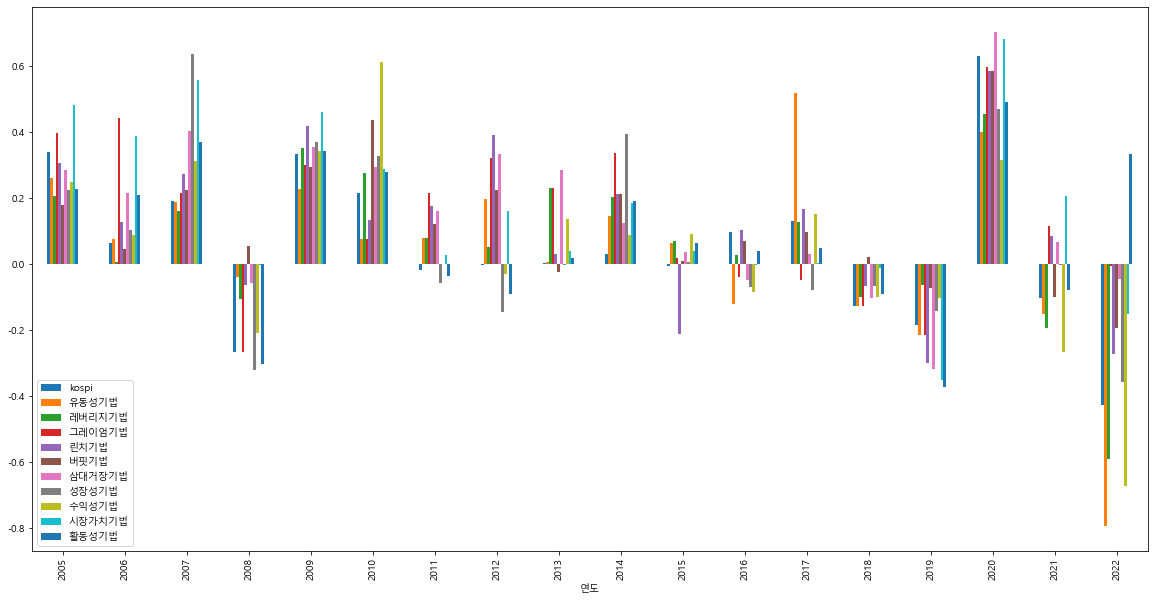

In [100]:
수익률.plot(x="연도", y=['kospi','유동성기법','레버리지기법','그레이엄기법','린치기법','버핏기법','삼대거장기법','성장성기법','수익성기법','시장가치기법','활동성기법'], kind="bar",figsize=(20,10))

<AxesSubplot:xlabel='연도'>

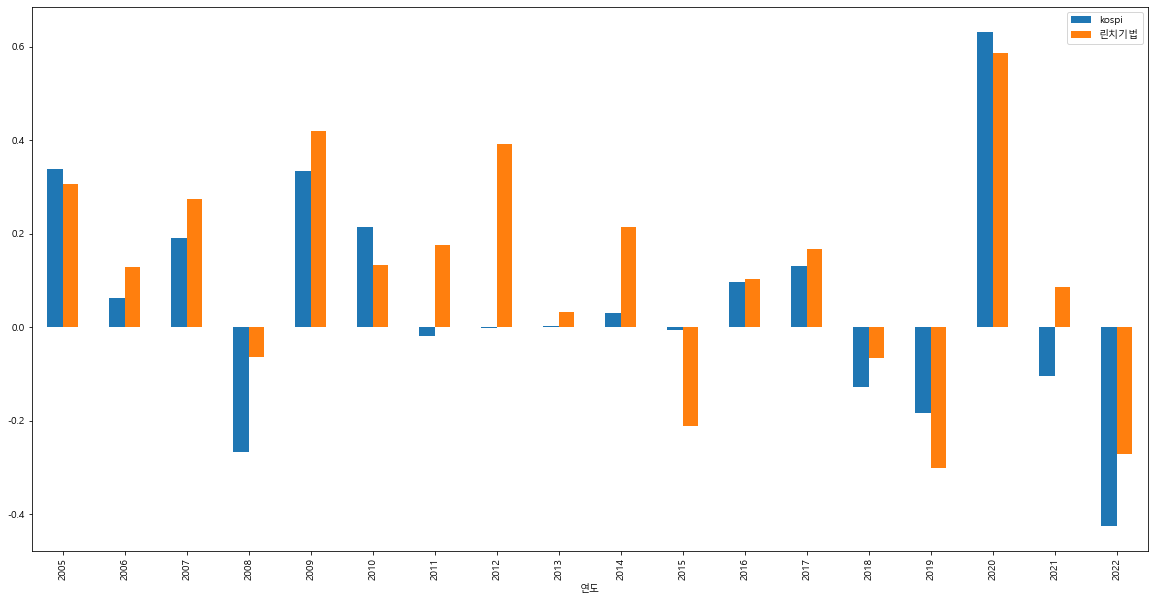

In [110]:
수익률.plot(x="연도", y=['kospi','린치기법'], kind="bar",figsize=(20,10))

In [7]:
연도수익률 =  수익률.loc[:,['유동성기법','레버리지기법','그레이엄기법','린치기법','버핏기법','삼대거장기법','성장성기법','수익성기법','시장가치기법','활동성기법','kospi']]

In [253]:
# 연도수익률

In [8]:
연도수익률.iloc[0]  = 연도수익률.iloc[0]+1


In [9]:
누적수익률= (1+연도수익률).cumprod()-1 

In [10]:
누적수익률['연도'] = 누적수익률.index.tolist()

## 누적수익률 10개종목 3개거장기법 코스피인덱스 기준

<AxesSubplot:xlabel='연도'>

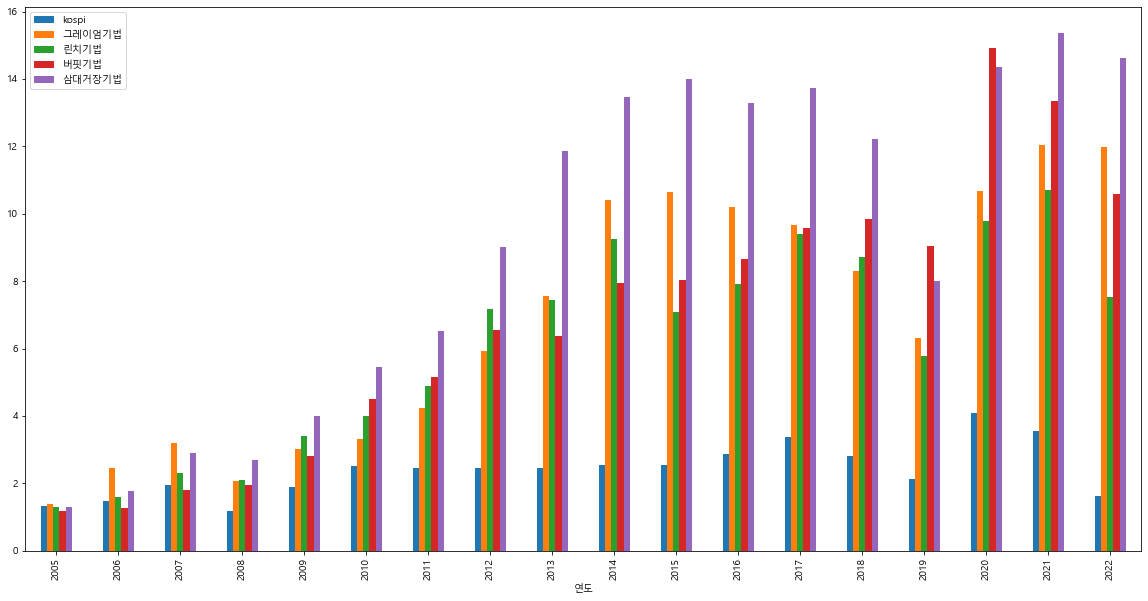

In [105]:
누적수익률.plot(x="연도", y=['kospi','그레이엄기법','린치기법','버핏기법','삼대거장기법'], kind="bar",figsize=(20,10))

## 누적수익률 10개종목선정 시장가치기법 코스피인덱스 기준

<AxesSubplot:xlabel='연도'>

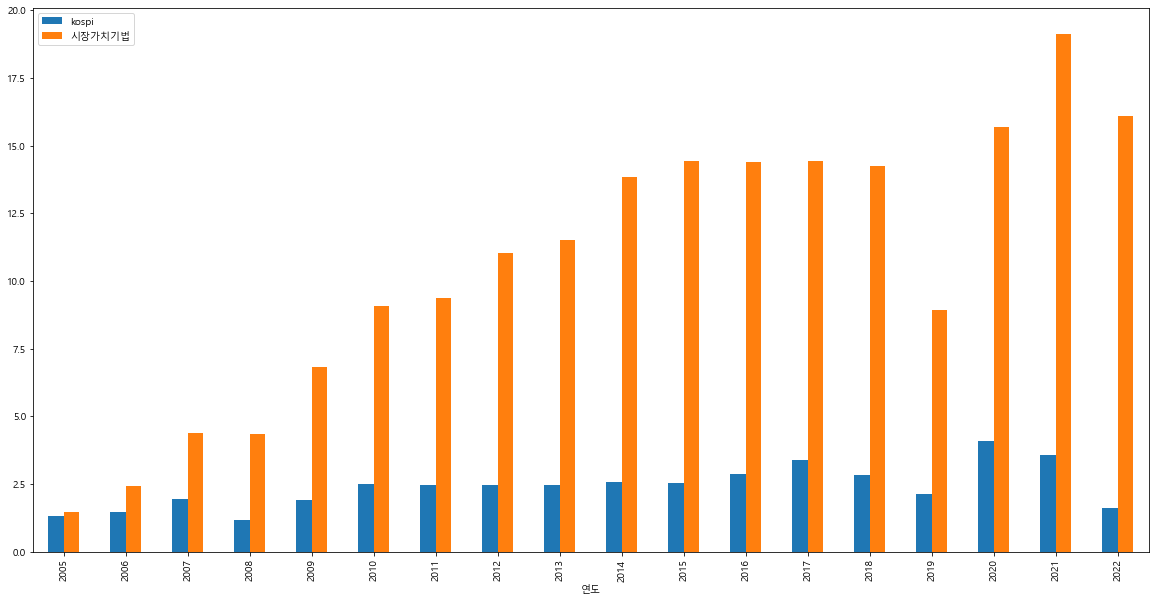

In [15]:
누적수익률.plot(x="연도", y=['kospi','시장가치기법'], kind="bar",figsize=(20,10))

## 누적수익률 10개종목 단순재무기법 코스피인덱스 기준

<AxesSubplot:xlabel='연도'>

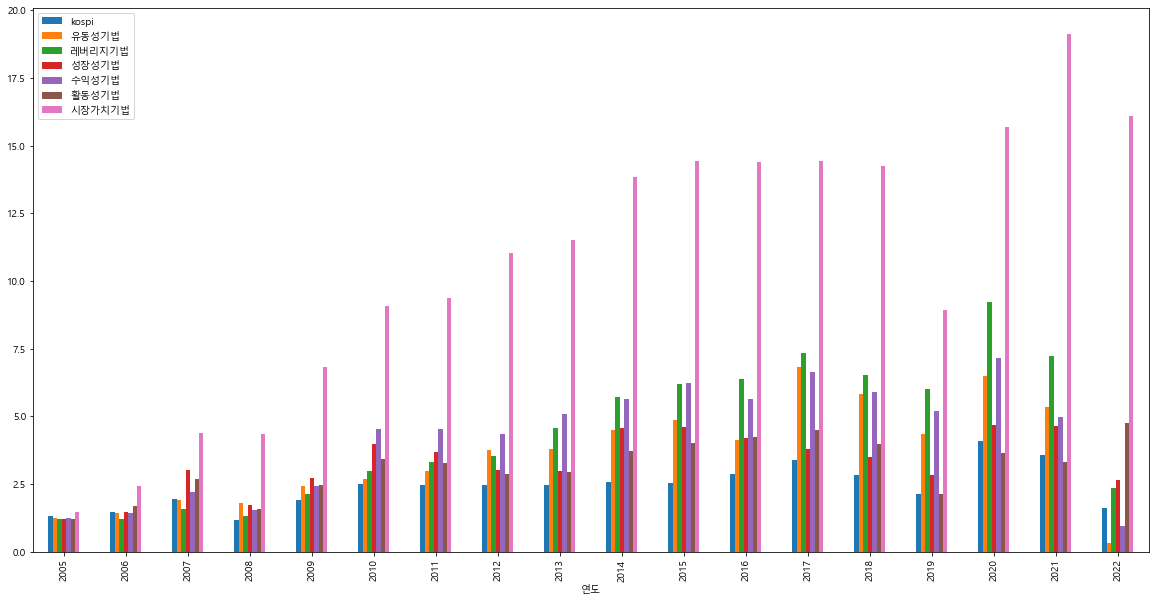

In [14]:
누적수익률.plot(x="연도", y=['kospi','유동성기법','레버리지기법','성장성기법','수익성기법','활동성기법','시장가치기법'], kind="bar",figsize=(20,10))

<AxesSubplot:xlabel='연도'>

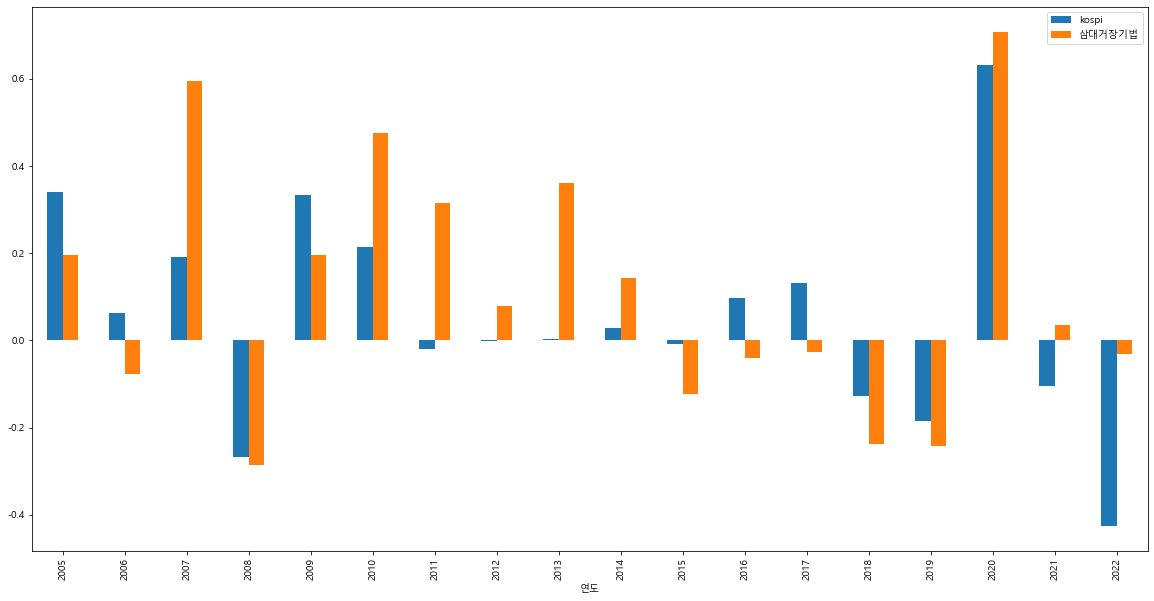

In [233]:
수익률.plot(x="연도", y=['kospi','삼대거장기법'], kind="bar",figsize=(20,10))

<AxesSubplot:xlabel='연도'>

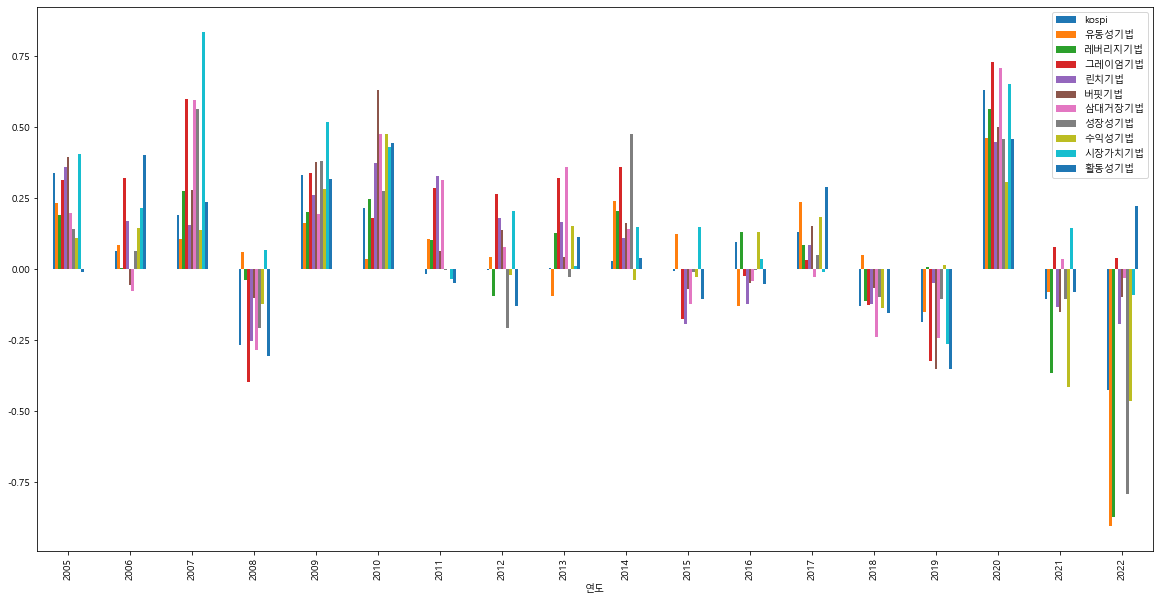

In [214]:
수익률.plot(x="연도", y=['kospi','유동성기법','레버리지기법','그레이엄기법','린치기법','버핏기법','삼대거장기법','성장성기법','수익성기법','시장가치기법','활동성기법'], kind="bar",figsize=(20,10))

## '포트폴리오 누적수익률'

In [237]:
기법리스트 = [유동성기법,레버리지기법,그레이엄기법,린치기법,버핏기법,삼대거장기법,성장성기법,수익성기법,시장가치기법,활동성기법] 

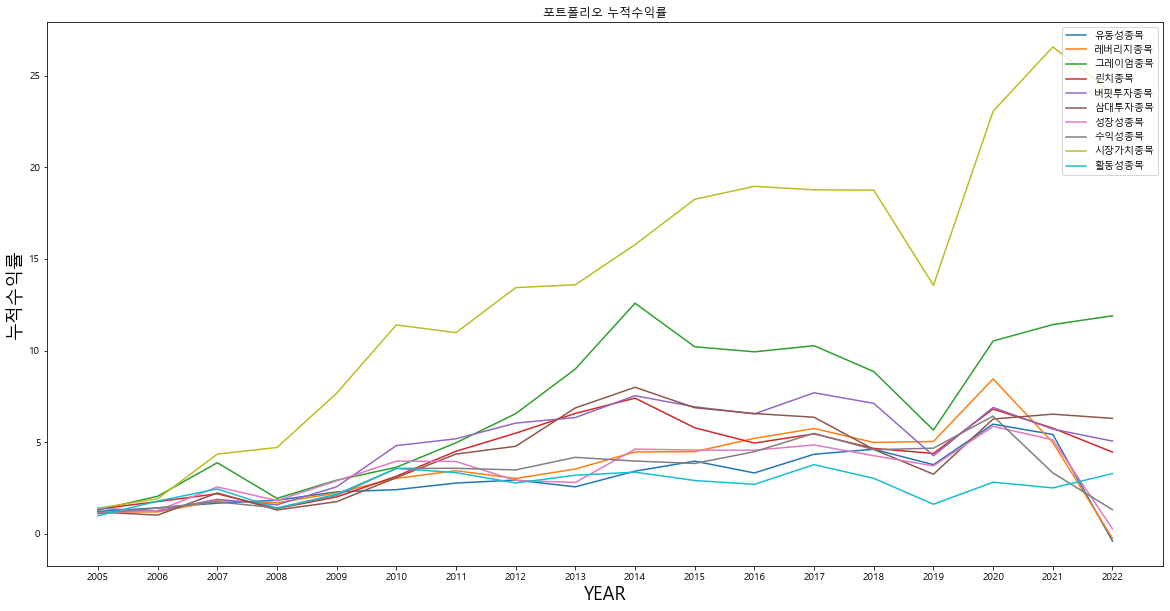

In [238]:
from matplotlib import pyplot as plt
제목 = '포트폴리오 누적수익률'
기법_list = 기법리스트
plt.figure(figsize=(20,10))

for 기법 in 기법_list:
    plt.plot(기법['누적수익률'],label=기법['재무비율방식'].unique().tolist())

plt.title(제목)
plt.xlabel('YEAR',fontsize=18)
plt.ylabel('누적수익률',fontsize=18)
plt.legend(총기법종목선정수익률['재무비율방식'].unique().tolist(), loc='upper right')
plt.show()

In [11]:
kospi = pd.DataFrame([0.33954658007830835,
 0.06300212964915385,
 0.191672937218779,
 -0.26710847563720924,
 0.3333388239955232,
 0.21503159153268914,
 -0.01858840545843857,
 -0.0016015669996046883,
 0.0025728977710012023,
 0.029583855365563395,
 -0.006934363878360804,
 0.09685227282233239,
 0.1319684522175151,
 -0.1281994490404238,
 -0.18467708236125316,
 0.6321050809559864,
 -0.10393316402999628,
 -0.42568472640422594])
kospi.columns = ['수익률']
kospi['연도'] = 코스피누적['연도']

In [13]:
kospi.to_csv('코스피연간수익률.csv',index=True)

In [10]:
수익률['kospi'][0] = 수익률['kospi'][0]+1
누적수익률= (1+수익률['kospi']).cumprod()-1 
kospi['누적수익률'] = 누적수익률


NameError: name '수익률' is not defined

In [1]:
import pandas as pd

In [2]:
코스피누적_list = [[2005, 1.339547],
[2006, 1.486943],
[2007, 1.963623],
[2008, 1.172014],
[2009, 1.896031],
[2010, 2.518769],
[2011, 2.453360],
[2012, 2.447829],
[2013, 2.456700],
[2014, 2.558963],
[2015, 2.534284],
[2016, 2.876587],
[2017, 3.388174],
[2018, 2.825613],
[2019, 2.119110],
[2020, 4.090715],
[2021, 3.561621],
[2022, 1.619809]]

In [6]:
코스피누적 = pd.DataFrame(코스피누적_list)
코스피누적.columns =['연도','누적수익률']

In [7]:
코스피누적.to_csv('코스피누적수익률.csv',index=True)

In [215]:
# from matplotlib import pyplot as plt
# 제목 = '포트폴리오 연간수익률'
# 기법_list = 기법리스트
# for 기법 in 기법_list:
#     print(기법['재무비율방식'].unique().tolist())
#     기법.plot.bar(x='연도', y='수익률', rot=0,figsize=(20,10))
#     plt.title(제목)
#     plt.xlabel('YEAR',fontsize=18)
#     plt.ylabel('수익률',fontsize=18)
#     plt.legend(기법['재무비율방식'].unique().tolist(), loc='upper right')
#     plt.show()


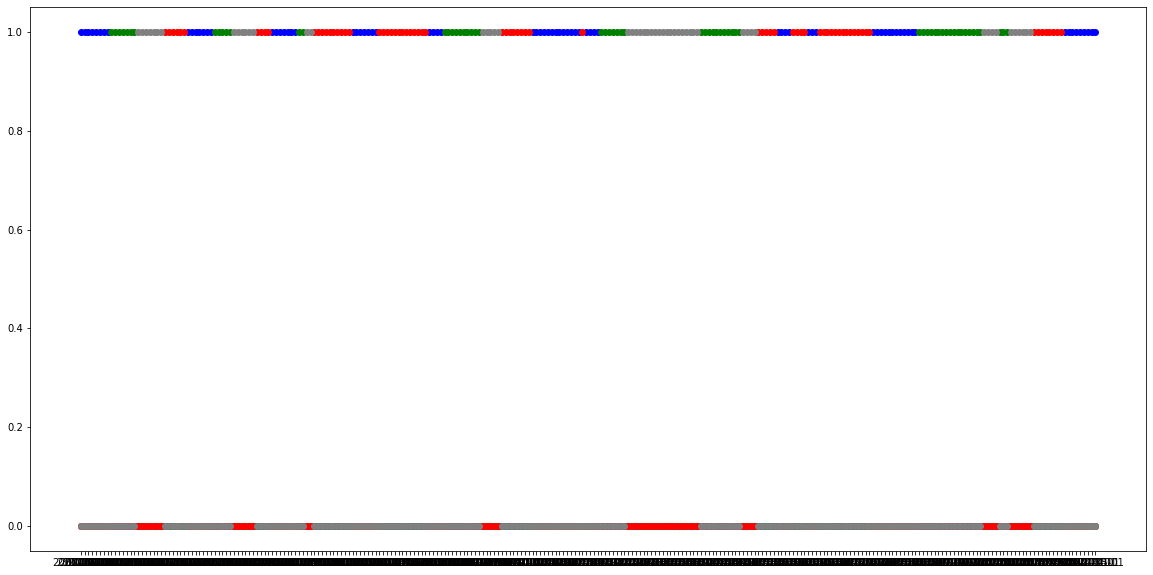

<Figure size 1440x720 with 0 Axes>

In [94]:
from matplotlib import pyplot as plt
import numpy as np


fig, ax1 = plt.subplots(figsize=(20,10))
plt.figure(figsize=(20,10))
ax1.plot
# line plot
ax1.scatter(경기4국면['거래일'].tolist(), 경기4국면['둔감'], color='blue')
ax1.scatter(경기4국면['거래일'].tolist(), 경기4국면['위축'], color='green')
ax1.scatter(경기4국면['거래일'].tolist(), 경기4국면['확장'], color='red')
ax1.scatter(경기4국면['거래일'].tolist(), 경기4국면['회복'], color='gray')
#ax1.scatter(df_momentum[회복].index, df_momentum[회복]['한국cli'], color='deeppink')
# ax2 = ax1.twinx()
# ax2.plot(경기4국면['거래일'], 경기4국면['기준금리'], color='black')


In [275]:
# 수익성기법['연도'] = 수익성기법.index.tolist()

In [274]:
# 수익성기법.plot.bar(x='연도', y='수익률', rot=0,figsize=(20,10))
# 유동성기법.plot.bar(x='연도', y='수익률', rot=0,figsize=(20,10))

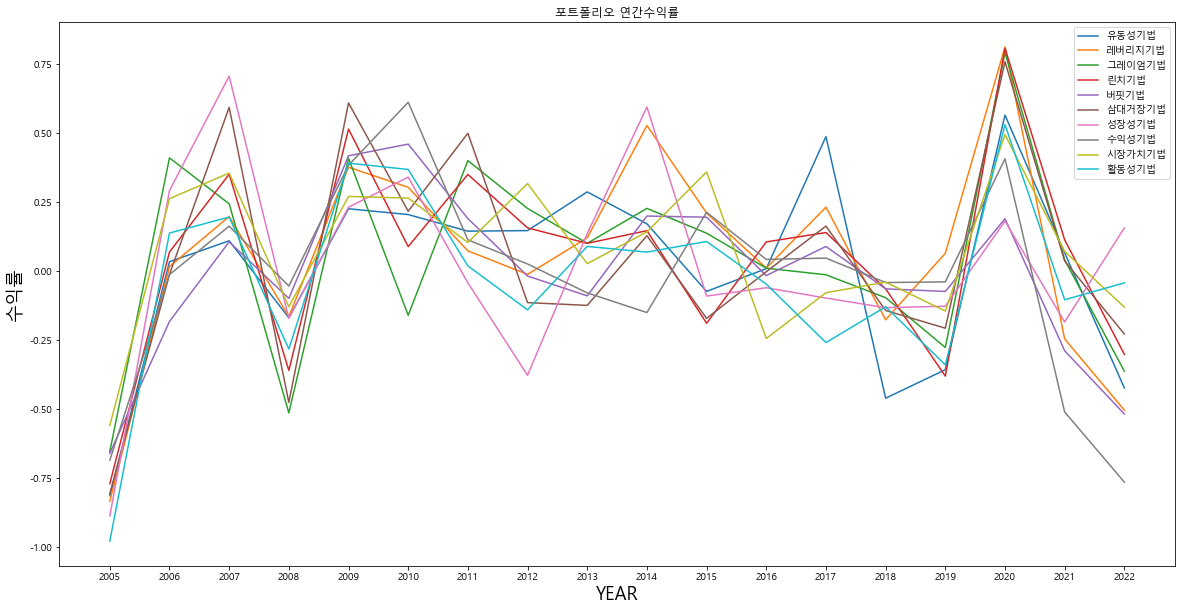

In [208]:
from matplotlib import pyplot as plt
제목 = '포트폴리오 연간수익률'
기법_list = 기법리스트
plt.figure(figsize=(20,10))

for 기법 in 기법_list:
    plt.plot(기법['수익률'],label=기법['재무비율방식'].unique().tolist())

plt.title(제목)
plt.xlabel('YEAR',fontsize=18)
plt.ylabel('수익률',fontsize=18)
plt.legend(총기법종목선정수익률['재무비율방식'].unique().tolist(), loc='upper right')
plt.show()

In [ ]:
# https://www.fnspace.com/Api/FinanceApi?key=5A2CB417DA795E28F5E0&format=json&code=A005930&item=M382900,M383300&consolgb=C&annualgb=QQ&accdategb=C&fraccyear=201206&toaccyear=202203

In [2]:
import pandas as pd

In [5]:
# 코스피A리스트 = pd.read_csv('./코스피A리스트.csv')

In [8]:
# 코스피리스트 = 코스피A리스트['code'].tolist()

In [9]:
# 코스피분기추가재무제표0509 = pd.DataFrame()
# for stockcode in 코스피리스트:

#     dsf_data  =  pd.read_json("https://www.fnspace.com/Api/FinanceApi?key=5A2CB417DA795E28F5E0&format=json&code="+stockcode+"&item=M382900,M383300&consolgb=C&annualgb=QQ&accdategb=C&fraccyear=201206&toaccyear=202112",typ='series')
#     df=pd.DataFrame(dsf_data['dataset'])
#     df2=pd.DataFrame(df['DATA'][0])
#     df2.columns=['DATE', 'YYMM', 'FS_YEAR','FS_MONTH', 'FS_QTR', 'MAIN_TERM', 'pcr','psr']
#     df2['code'] = dsf_data['code']
#     코스피분기추가재무제표0509 = pd.concat([코스피분기추가재무제표0509, df2])
    
# 코스피분기추가재무제표0509.head()
# 코스피분기추가재무제표0509.to_csv('코스피분기추가재무제표0509.csv',index=False)

In [305]:
test

key                                       5A2CB417DA795E28F5E0
format                                                    json
success                                                   true
errcd                                                         
errmsg                                                        
code                                           A000660,A005930
item                           M211600,M223000,M123955,M362500
consolgb                                                     C
annualgb                                                    QQ
accdategb                                                    C
fraccyear                                               201706
toaccyear                                               202203
dataset      [{'CODE': 'A000660', 'NAME': 'SK하이닉스', 'DATA':...
dtype: object

In [309]:
# test
# for stockcode in 코스피3개:
    
# df=pd.DataFrame(test['dataset'])
# df2=pd.DataFrame(df['DATA'][0])
# df2.columns=['DATE', 'YYMM', 'FS_YEAR','FS_MONTH', 'FS_QTR', 'MAIN_TERM', 'roa','유보율', '실적보고발표일', 'eps성장율']
# df2['code'] = test['code']
# 코스피재무제표 = pd.concat([코스피재무제표, df2])

# 분기데이터 확인

In [11]:
분기데이터 = pd.read_csv('./fnspace_v5.csv')

In [31]:
분기데이터['날짜'].value_counts()[45:60]

201509    4524
201503    4518
201403    4476
201409    4476
201303    4446
201309    4446
201209    4428
201006    1890
200906     690
200506     587
200806     534
200606     531
200406     521
200306     520
200106     493
Name: 날짜, dtype: int64

In [28]:
분기데이터

,날짜,종목코드,종목명,시장타입,account_id,재무요소,값
0,200012,5930,삼성전자,K,1300,당좌자산(계),9.955097e+12
1,200012,5930,삼성전자,K,1400,재고자산(계),4.724876e+12
2,200012,5930,삼성전자,K,2000,유동자산(계),1.467997e+13
3,200012,5930,삼성전자,K,4000,비유동자산(계),3.174153e+13
4,200012,5930,삼성전자,K,5000,자산총계,4.642150e+13
...,...,...,...,...,...,...,...
998755,201912,7660,이수페타시스,K,75684,총자산회전율,2.596025e-01
998756,202006,7660,이수페타시스,B,75684,총자산회전율,2.779672e-01
998757,202012,7660,이수페타시스,K,75684,총자산회전율,-8.546766e-03
998758,202106,7660,이수페타시스,B,75684,총자산회전율,2.185756e-01


In [32]:
분기데이터[분기데이터['날짜']==201503]

,날짜,종목코드,종목명,시장타입,account_id,재무요소,값
788131,201503,95570,AJ네트웍스,K,8155,roa,0.483000
788170,201503,6840,AK홀딩스,K,8155,roa,1.338000
788209,201503,27410,BGF,K,8155,roa,2.391000
788269,201503,138930,BNK금융지주,K,8155,roa,0.226000
788308,201503,1460,BYC,K,8155,roa,0.415000
...,...,...,...,...,...,...,...
969394,201503,5870,휴니드,K,80000,PSR,NaN
969433,201503,79980,휴비스,K,80000,PSR,1.139470
969472,201503,5010,휴스틸,K,80000,PSR,0.796240
969511,201503,540,흥국화재,K,80000,PSR,0.264480


# 경기국면과 수익률  지표확인
## 경기국면은 연간수익률의 매수기준인 3월을 기준으로 선정함
## 연도별 상위 기법을 점수,랭킹화 해서 선정하는것이 최적의 선택일것 같다.

In [51]:
총기법종목선정수익률 = pd.read_csv('./총기법종목선정수익률.csv')

In [52]:
총기법종목선정수익률

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
0,20050401,20060322,"['엔씨소프트', '신도리코', '동서', '대덕', '퍼시스']",0.186703,1.186703,유동성기법,2005
1,20060317,20070307,"['한화', 'SBS', '엔씨소프트', '동서', '신도리코']",0.034575,1.262307,유동성기법,2006
2,20070402,20080324,"['KT&G', '엔씨소프트', '태광산업', '동서', '신도리코']",0.110392,1.512048,유동성기법,2007
3,20080319,20090309,"['SBS', '아모레G', '엔씨소프트', 'LS네트웍스', '동서']",-0.168331,1.089192,유동성기법,2008
4,20090320,20100310,"['CJ대한통운', '엔씨소프트', '에스원', '동서', '아모레G']",0.226589,1.562580,유동성기법,2009
...,...,...,...,...,...,...,...
175,20180410,20190401,"['에스원', '한샘', 'GS리테일', 'HMM', '하나투어']",-0.128715,1.630922,활동성기법,2018
176,20190325,20200316,"['코웨이', '에스원', 'BGF리테일', 'CJ', 'GS리테일']",-0.339119,0.738727,활동성기법,2019
177,20200402,20210323,"['코웨이', '이마트', 'LG이노텍', '한샘', 'SK네트웍스']",0.531379,1.662650,활동성기법,2020
178,20210324,20220314,"['코웨이', '이마트', '에스원', 'GS리테일', 'BGF리테일']",-0.103209,1.387840,활동성기법,2021


In [117]:
총기법종목선정수익률['연도'] = 총기법종목선정수익률['연도'].astype(str)

## 위축  2008년,2014년,2019년


In [121]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2008')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
129,20080321,20090311,"['삼성전자', 'POSCO홀딩스', 'LG디스플레이', 'SK텔레콤', 'KT&G']",-0.053560,1.518582,수익성기법,2008
75,20080402,20090323,"['LG디스플레이', 'SK텔레콤', 'KT&G', '팬오션', '아모레퍼시픽']",-0.098378,0.910418,버핏기법,2008
147,20080321,20090311,"['영풍', '농심홀딩스', '대한유화', '신라교역', '한샘']",-0.128563,2.643336,시장가치기법,2008
21,20080321,20090311,"['NAVER', '현대미포조선', '아모레퍼시픽', '에스원', 'SBS']",-0.164384,1.206126,레버리지기법,2008
3,20080319,20090309,"['SBS', '아모레G', '엔씨소프트', 'LS네트웍스', '동서']",-0.168331,1.089192,유동성기법,2008
111,20080321,20090311,"['한국조선해양', '현대미포조선', '효성', '한온시스템', '태영건설']",-0.170472,2.868808,성장성기법,2008
165,20080321,20090311,"['신세계', '삼성중공업', 'HMM', 'SK네트웍스', '포스코인터내셔널']",-0.281630,0.978639,활동성기법,2008
57,20080319,20090309,"['고려아연', '대한해운', '퍼시스', '대한유화', '유니드']",-0.359437,1.065453,린치기법,2008
93,20080319,20090309,"['대한해운', '퍼시스', '다우기술', '대한유화', '광주신세계']",-0.475360,0.813771,삼대거장기법,2008
39,20080317,20090309,"['대한해운', '영풍', '세아홀딩스', '대한유화', '화성산업']",-0.513478,1.005151,그레이엄기법,2008


In [122]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2014')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
117,20140401,20150323,"['LG생활건강', '한온시스템', '한샘', '서연', '무학']",0.595597,5.917193,성장성기법,2014
27,20140404,20150325,"['NAVER', 'KT&G', '아모레퍼시픽', '고려아연', '아모레G']",0.528365,6.211255,레버리지기법,2014
45,20140320,20150310,"['SK가스', '대웅', '조선내화', '노루홀딩스', '풍산홀딩스']",0.227925,4.526658,그레이엄기법,2014
81,20140411,20150401,"['삼성전자', 'SK하이닉스', 'LG생활건강', '한온시스템', '엔씨소프트']",0.200186,4.065742,버핏기법,2014
9,20140321,20150311,"['고려아연', '엔씨소프트', '영원무역', '카카오', '빙그레']",0.172099,5.128656,유동성기법,2014
63,20140321,20150311,"['삼성전자', '현대모비스', 'SK하이닉스', '영원무역홀딩스', '서울가스']",0.147260,5.737495,린치기법,2014
153,20140321,20150311,"['지역난방공사', '조선내화', '풍산홀딩스', '대성홀딩스', '진양홀딩스']",0.142805,9.017733,시장가치기법,2014
99,20140321,20150311,"['삼성전자', 'SK하이닉스', '광주신세계', '일신방직', '자화전자']",0.128867,3.678201,삼대거장기법,2014
171,20140403,20150324,"['현대글로비스', '코웨이', '에스원', 'SK네트웍스', 'GS리테일']",0.069364,2.854739,활동성기법,2014
135,20140411,20150401,"['삼성전자', '현대모비스', 'NAVER', '기아', '한국타이어앤테크놀로지']",-0.149557,4.039166,수익성기법,2014


In [123]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2019')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
32,20190322,20200311,"['삼성전자', 'SK하이닉스', 'LG생활건강', 'NAVER', 'KT&G']",0.065129,8.559933,레버리지기법,2019
140,20190322,20200311,"['삼성전자', 'LG생활건강', '삼성전기', '포스코케미칼', '금호석유']",-0.038364,5.165694,수익성기법,2019
86,20190321,20200310,"['삼성전자', 'SK하이닉스', 'LG생활건강', '삼성에스디에스', '롯데케미칼']",-0.073161,4.641123,버핏기법,2019
122,20190408,20200330,"['SK하이닉스', '삼성전기', 'CJ제일제당', 'CJ대한통운', '포스코케미칼']",-0.126718,3.051312,성장성기법,2019
158,20190322,20200311,"['GS건설', '효성', 'SKC', '롯데정밀화학', '아이에스동서']",-0.144139,6.814395,시장가치기법,2019
104,20190322,20200311,"['삼성전자', 'SK하이닉스', 'SK텔레콤', '롯데케미칼', '태광산업']",-0.206226,2.069493,삼대거장기법,2019
50,20190322,20200311,"['롯데케미칼', '롯데정밀화학', '대한유화', '현대건설기계', 'DB하이텍']",-0.276221,3.110193,그레이엄기법,2019
176,20190325,20200316,"['코웨이', '에스원', 'BGF리테일', 'CJ', 'GS리테일']",-0.339119,0.738727,활동성기법,2019
14,20190322,20200311,"['한올바이오파마', 'TKG휴켐스', 'BGF', '빙그레', '남양유업']",-0.356812,1.964793,유동성기법,2019
68,20190322,20200311,"['롯데케미칼', '금호석유', '롯데정밀화학', '대한유화', '쿠쿠홀딩스']",-0.380045,3.004842,린치기법,2019


## 둔감 2006년, 2010년,2016년,2018년 (2022년)

In [124]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2006')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
37,20060316,20070306,"['동국제강', '계룡건설', '세아홀딩스', '삼부토건', '대한유화']",0.411109,2.311726,그레이엄기법,2006
109,20060323,20070313,"['롯데쇼핑', '신세계', '현대모비스', 'GS건설', '현대미포조선']",0.292500,1.731172,성장성기법,2006
145,20060317,20070307,"['GS', '금호석유', '서울가스', '삼부토건', '조선내화']",0.263143,2.083177,시장가치기법,2006
163,20060323,20070313,"['신세계', 'SK네트웍스', '현대글로비스', 'LX인터내셔널', '농심']",0.138622,1.302272,활동성기법,2006
55,20060317,20070307,"['LG화학', '한섬', '퍼시스', '계룡건설', '영풍']",0.069757,1.385542,린치기법,2006
1,20060317,20070307,"['한화', 'SBS', '엔씨소프트', '동서', '신도리코']",0.034575,1.262307,유동성기법,2006
19,20060404,20070326,"['KT&G', 'NAVER', '아모레G', '롯데지주', '에스원']",0.016899,1.203031,레버리지기법,2006
91,20060317,20070307,"['한국전력', '현대모비스', 'GS', '금호석유', '한섬']",-0.011330,1.168728,삼대거장기법,2006
127,20060329,20070319,"['삼성전자', 'KT&G', '아모레G', 'HDC', '한국앤컴퍼니']",-0.011978,1.287126,수익성기법,2006
73,20060404,20070326,"['현대모비스', '아모레G', '롯데지주', '현대글로비스', '에스원']",-0.181968,0.914193,버핏기법,2006


In [125]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2010')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
131,20100407,20110328,"['현대모비스', 'KT&G', '아모레퍼시픽', '고려아연', '롯데케미칼']",0.612580,4.622708,수익성기법,2010
77,20100401,20110322,"['LG화학', '아모레퍼시픽', 'LG생활건강', '강원랜드', '엔씨소프트']",0.460879,2.958988,버핏기법,2010
167,20100503,20110425,"['포스코인터내셔널', 'SK네트웍스', '에스원', 'LX인터내셔널', '태광산업']",0.369055,2.770348,활동성기법,2010
113,20100401,20110322,"['삼성전자', '현대모비스', '삼성전기', '아모레퍼시픽', '삼성엔지니어링']",0.341171,5.393723,성장성기법,2010
23,20100503,20110425,"['아모레퍼시픽', '엔씨소프트', '제일기획', '동서', '아모레G']",0.304392,2.962908,레버리지기법,2010
149,20100319,20110309,"['GS', 'CJ', '태광산업', '고려제강', '신도리코']",0.265445,4.860714,시장가치기법,2010
95,20100323,20110314,"['강원랜드', '웅진씽크빅', '대한유화', '모토닉', 'KPX홀딩스']",0.217670,2.556101,삼대거장기법,2010
5,20100316,20110307,"['고려아연', '엔씨소프트', '유한양행', '동서', 'SBS']",0.205567,2.089362,유동성기법,2010
59,20100317,20110307,"['LG', '영원무역홀딩스', '한섬', 'KPX홀딩스', '서울가스']",0.089435,2.410064,린치기법,2010
41,20100318,20110308,"['삼천리', '농심홀딩스', '모토닉', 'KPX홀딩스', 'KISCO홀딩스']",-0.159446,1.375473,그레이엄기법,2010


In [126]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2016')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
65,20160322,20170313,"['SK하이닉스', '롯데케미칼', 'LG디스플레이', '영원무역홀딩스', '세방전지']",0.106461,5.049651,린치기법,2016
137,20160411,20170403,"['아모레퍼시픽', 'SK하이닉스', 'KT&G', '강원랜드', '에스원']",0.042998,5.380213,수익성기법,2016
29,20160323,20170313,"['현대모비스', 'NAVER', 'KT&G', '코웨이', '카카오']",0.011796,7.837057,레버리지기법,2016
47,20160318,20170308,"['현대차', 'SK하이닉스', '영원무역홀딩스', '동양', '유니드']",0.011243,5.360211,그레이엄기법,2016
11,20160412,20170403,"['동양', '빙그레', '남양유업', '에이프로젠제약', '씨에스윈드']",0.009599,4.736038,유동성기법,2016
101,20160321,20170313,"['한국전력', 'SK', '롯데케미칼', 'GS', '대한유화']",-0.001574,2.873124,삼대거장기법,2016
83,20160411,20170403,"['아모레퍼시픽', 'NAVER', '강원랜드', '코웨이', '오뚜기']",-0.015593,4.964294,버핏기법,2016
173,20160411,20170403,"['현대글로비스', 'BGF', 'GS리테일', 'LIG넥스원', '현대그린푸드']",-0.046507,3.072489,활동성기법,2016
119,20160407,20170328,"['아모레퍼시픽', '셀트리온', '한국항공우주', '한샘', 'BGF']",-0.059614,4.919464,성장성기법,2016
155,20160322,20170313,"['현대건설', '현대백화점', '현대위아', '영원무역홀딩스', '하이트진로홀딩스']",-0.243801,9.303708,시장가치기법,2016


In [127]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2018')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
157,20180323,20190313,"['GS', '현대백화점', '아시아나항공', '대한해운', '종근당홀딩스']",-0.039282,8.130453,시장가치기법,2018
139,20180402,20190325,"['삼성전자', 'LG생활건강', 'LG', '롯데케미칼', '엔씨소프트']",-0.040829,5.411673,수익성기법,2018
67,20180323,20190313,"['삼성전자', 'SK하이닉스', 'SK', '롯데케미칼', '태광산업']",-0.063666,5.459887,린치기법,2018
85,20180406,20190327,"['삼성전자', 'SK하이닉스', '롯데케미칼', '넷마블', '엔씨소프트']",-0.063721,5.086414,버핏기법,2018
49,20180319,20190311,"['LG디스플레이', 'GS', 'SK가스', 'DB하이텍', '영원무역홀딩스']",-0.095667,4.678797,그레이엄기법,2018
175,20180410,20190401,"['에스원', '한샘', 'GS리테일', 'HMM', '하나투어']",-0.128715,1.630922,활동성기법,2018
121,20180406,20190327,"['삼성전자', '롯데케미칼', '카카오', 'LG이노텍', '영풍']",-0.131986,3.639182,성장성기법,2018
103,20180322,20190312,"['삼성전자', 'SK텔레콤', '롯데케미칼', 'GS', '현대글로비스']",-0.142091,2.866962,삼대거장기법,2018
31,20180323,20190313,"['SK하이닉스', '아모레퍼시픽', 'KT&G', '아모레G', '엔씨소프트']",-0.175874,7.975374,레버리지기법,2018
13,20180323,20190313,"['일진머티리얼즈', '잇츠한불', '에이프로젠 MED', 'BGF', '에이블씨엔씨']",-0.460071,3.609528,유동성기법,2018


## 회복 2005,2009,2012,2013,2020

In [128]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2005')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
144,20050401,20060322,"['한국전력', '동국제강', '고려아연', '금호석유', '효성']",0.440877,1.440877,시장가치기법,2005
36,20050401,20060322,"['한섬', '계룡건설', '동원F&B', '고려제강', '삼영전자']",0.346896,1.346896,그레이엄기법,2005
72,20050411,20060403,"['삼성전자', 'POSCO홀딩스', 'SK하이닉스', '삼성SDI', '아모레G']",0.339997,1.339997,버핏기법,2005
126,20050401,20060322,"['POSCO홀딩스', 'SK텔레콤', 'KT&G', '아모레G', 'DL']",0.314853,1.314853,수익성기법,2005
54,20050401,20060322,"['삼성전자', '삼성SDI', '태광산업', '한섬', '영풍']",0.229986,1.229986,린치기법,2005
90,20050401,20060322,"['삼성전자', '삼성SDI', 'LG화학', '동국제강', '고려아연']",0.193581,1.193581,삼대거장기법,2005
0,20050401,20060322,"['엔씨소프트', '신도리코', '동서', '대덕', '퍼시스']",0.186703,1.186703,유동성기법,2005
18,20050401,20060322,"['삼성전자', 'KT&G', '삼성SDI', '아모레G', '농심']",0.166422,1.166422,레버리지기법,2005
108,20050407,20060328,"['POSCO홀딩스', 'LG디스플레이', 'LG전자', 'S-Oil', '현대모비스']",0.113092,1.113092,성장성기법,2005
162,20050401,20060322,"['삼성전자', '신세계', 'SK네트웍스', '농심', '에스원']",0.021981,1.021981,활동성기법,2005


In [129]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2009')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
94,20090320,20100310,"['현대모비스', 'LG화학', '현대제철', '퍼시스', '다우기술']",0.610133,1.920414,삼대거장기법,2009
58,20090316,20100308,"['현대모비스', 'LG화학', '고려아연', '농심홀딩스', '신라교역']",0.515464,2.130121,린치기법,2009
76,20090323,20100315,"['POSCO홀딩스', 'NAVER', '삼성SDI', '팬오션', '에스원']",0.418540,1.710003,버핏기법,2009
40,20090320,20100310,"['고려아연', '퍼시스', '한섬', 'KPX케미칼', '한국단자']",0.409410,1.826080,그레이엄기법,2009
166,20090320,20100310,"['신세계', '코웨이', '현대글로비스', 'SK네트웍스', '태광산업']",0.391855,1.753979,활동성기법,2009
130,20090414,20100405,"['POSCO홀딩스', 'NAVER', '현대모비스', 'OCI', '현대제철']",0.384421,2.486778,수익성기법,2009
22,20090323,20100315,"['아모레퍼시픽', '유한양행', '엔씨소프트', '제일기획', '동서']",0.377132,2.038127,레버리지기법,2009
148,20090320,20100310,"['LG디스플레이', '효성', '동국제강', '영풍', 'STX엔진']",0.271183,3.631346,시장가치기법,2009
112,20090414,20100405,"['삼성중공업', '두산', '한화', '현대글로비스', '롯데지주']",0.232232,3.767270,성장성기법,2009
4,20090320,20100310,"['CJ대한통운', '엔씨소프트', '에스원', '동서', '아모레G']",0.226589,1.562580,유동성기법,2009


In [130]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2012')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
151,20120323,20130313,"['고려제강', 'E1', '서울가스', '광동제약', 'NICE']",0.317988,7.530395,시장가치기법,2012
43,20120321,20130311,"['대웅제약', 'KPX케미칼', '신라교역', '풍산홀딩스', 'KPX홀딩스']",0.227689,3.086766,그레이엄기법,2012
61,20120322,20130312,"['고려아연', '아모레G', '카프로', '영원무역', '영원무역홀딩스']",0.157470,4.332469,린치기법,2012
7,20120411,20130401,"['엔씨소프트', '현대홈쇼핑', '카카오', '유한양행', '빙그레']",0.147474,3.060323,유동성기법,2012
133,20120402,20130325,"['삼성전자', '고려아연', '엔씨소프트', 'OCI', '셀트리온']",0.026459,5.428986,수익성기법,2012
25,20120322,20130312,"['엔씨소프트', '롯데정밀화학', '현대그린푸드', '유한양행', '한섬']",-0.011284,3.208106,레버리지기법,2012
79,20120323,20130313,"['SK이노베이션', '롯데케미칼', '고려아연', '아모레퍼시픽', '강원랜드']",-0.017223,3.633799,버핏기법,2012
97,20120316,20130306,"['SK이노베이션', 'SK텔레콤', '고려아연', '코오롱인더', '카프로']",-0.113608,3.728790,삼대거장기법,2012
169,20120406,20130327,"['HMM', '포스코인터내셔널', 'LX인터내셔널', '현대그린푸드', '팬오션']",-0.139771,2.306754,활동성기법,2012
115,20120501,20130422,"['SK이노베이션', '롯데케미칼', '아모레퍼시픽', 'OCI', '한라홀딩스']",-0.377305,2.814640,성장성기법,2012


In [131]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2013')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
8,20130411,20140401,"['엔씨소프트', 'TKG휴켐스', '일진머티리얼즈', '삼영무역', '케이씨']",0.287776,4.228786,유동성기법,2013
116,20130412,20140402,"['삼성전자', 'NAVER', '오리온홀딩스', '현대글로비스', '한국가스공사']",0.136458,3.335177,성장성기법,2013
26,20130412,20140402,"['LG생활건강', '셀트리온', '아모레G', '현대그린푸드', '동서']",0.121236,3.718279,레버리지기법,2013
44,20130322,20140312,"['오리온홀딩스', '영풍', '서울가스', '신라교역', '디티알오토모티브']",0.101313,3.500809,그레이엄기법,2013
62,20130322,20140312,"['현대모비스', '영풍', '세방전지', '삼양홀딩스', '서울가스']",0.101307,4.872684,린치기법,2013
170,20130404,20140325,"['이마트', 'GS', 'GKL', 'SK네트웍스', '빙그레']",0.090103,2.604704,활동성기법,2013
152,20130322,20140312,"['포스코인터내셔널', '영풍', '풍산', '에스엘', '휴비스']",0.027610,7.765916,시장가치기법,2013
134,20130405,20140326,"['셀트리온', '금호석유', '영원무역', '스카이라이프', 'LG헬로비전']",-0.078340,4.925340,수익성기법,2013
80,20130322,20140312,"['현대모비스', '삼성전기', '오리온홀딩스', '엔씨소프트', '빙그레']",-0.089128,3.220798,버핏기법,2013
98,20130322,20140312,"['현대모비스', '오리온홀딩스', '영풍', '스카이라이프', '대덕']",-0.123633,3.144154,삼대거장기법,2013


In [132]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2020')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
33,20200401,20210322,"['LG생활건강', 'F&F홀딩스', '롯데정밀화학', '대한유화', '쿠쿠홀딩스']",0.813265,16.334693,레버리지기법,2020
69,20200323,20210315,"['신세계', '영원무역', '더블유게임즈', '대한유화', '영원무역홀딩스']",0.808327,6.242064,린치기법,2020
51,20200320,20210310,"['영풍', '롯데정밀화학', 'SK가스', '대한유화', '영원무역홀딩스']",0.792861,6.369005,그레이엄기법,2020
105,20200320,20210310,"['영풍', 'HDC현대산업개발', '대상', 'SK가스', '효성화학']",0.759508,4.400797,삼대거장기법,2020
15,20200323,20210315,"['엔씨소프트', '한전KPS', '부광약품', '한올바이오파마', '태광산업']",0.566260,3.643635,유동성기법,2020
177,20200402,20210323,"['코웨이', '이마트', 'LG이노텍', '한샘', 'SK네트웍스']",0.531379,1.662650,활동성기법,2020
159,20200320,20210310,"['KT', '한화', '영풍', '오리온홀딩스', '태광산업']",0.495491,10.686358,시장가치기법,2020
141,20200401,20210322,"['LG생활건강', '엔씨소프트', '오리온', '더존비즈온', '휠라홀딩스']",0.407615,7.678923,수익성기법,2020
87,20200410,20210331,"['LG생활건강', '삼성에스디에스', '강원랜드', '오리온', '에스원']",0.190600,5.716322,버핏기법,2020
123,20200424,20210414,"['LG생활건강', '더존비즈온', '한국항공우주', '신세계', '신세계인터내셔날']",0.182047,3.788841,성장성기법,2020


## 확장 2007,2011,2015,2017,2021

In [134]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2007')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
110,20070402,20080324,"['한국조선해양', '현대건설', '현대미포조선', '한화에어로스페이스', '두산']",0.707644,3.663869,성장성기법,2007
92,20070402,20080324,"['고려아연', '대한해운', '영풍', '서울가스', '대한유화']",0.594102,2.457174,삼대거장기법,2007
146,20070402,20080324,"['현대제철', '대한항공', '대한유화', '조선내화', '화성산업']",0.356016,3.180838,시장가치기법,2007
56,20070402,20080324,"['현대제철', '고려아연', '영풍', '계룡건설', '금호전기']",0.351656,2.224432,린치기법,2007
38,20070402,20080324,"['고려아연', '대한유화', '계룡건설', '일성신약', '모토닉']",0.244485,3.121394,그레이엄기법,2007
20,20070404,20080324,"['KT&G', '현대미포조선', '롯데지주', '롯데칠성', '에스원']",0.198403,1.640118,레버리지기법,2007
164,20070402,20080324,"['신세계', 'SK네트웍스', '포스코인터내셔널', 'HMM', '유수홀딩스']",0.196360,1.754347,활동성기법,2007
128,20070402,20080324,"['삼성전자', 'SK텔레콤', 'KT&G', '대우건설', 'HDC']",0.163518,1.661112,수익성기법,2007
2,20070402,20080324,"['KT&G', '엔씨소프트', '태광산업', '동서', '신도리코']",0.110392,1.512048,유동성기법,2007
74,20070404,20080324,"['KT&G', '롯데지주', '에스원', '대한유화', '한솔테크닉스']",0.106925,1.118869,버핏기법,2007


In [135]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2011')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
96,20110318,20120307,"['남양유업', '한섬', '영원무역', '무림P&P', 'SK가스']",0.500204,4.334876,삼대거장기법,2011
42,20110318,20120307,"['한섬', '영원무역', '모토닉', '세방', '신라교역']",0.401332,2.328827,그레이엄기법,2011
60,20110318,20120307,"['신도리코', '한섬', '영원무역', '광주신세계', '풍산홀딩스']",0.351002,3.607002,린치기법,2011
78,20110323,20120312,"['SK하이닉스', '아모레퍼시픽', '엔씨소프트', '현대글로비스', '코웨이']",0.190962,3.715005,버핏기법,2011
6,20110322,20120312,"['엔씨소프트', '유한양행', '카카오', 'SBS', '남양유업']",0.145378,2.538488,유동성기법,2011
132,20110401,20120321,"['아모레퍼시픽', '강원랜드', '엔씨소프트', '태광산업', '카프로']",0.113924,5.263267,수익성기법,2011
150,20110321,20120312,"['태광산업', '지역난방공사', '신도리코', '고려제강', '대교']",0.104351,5.472287,시장가치기법,2011
24,20110329,20120319,"['LG화학', '롯데정밀화학', '유한양행', '현대그린푸드', 'LF']",0.073992,3.256133,레버리지기법,2011
168,20110318,20120307,"['신세계', '현대글로비스', 'HMM', '포스코인터내셔널', '한화']",0.019545,2.844039,활동성기법,2011
114,20110322,20120312,"['한화솔루션', 'LG이노텍', '동국제강', '락앤락', '카카오']",-0.041870,5.126019,성장성기법,2011


In [136]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2015')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
154,20150330,20160321,"['한국전력', '현대백화점', '효성', 'SK가스', '대한유화']",0.360154,12.625658,시장가치기법,2015
136,20150403,20160323,"['현대모비스', '아모레퍼시픽', 'KT&G', 'LG생활건강', '한국타이어앤테...",0.213928,5.117187,수익성기법,2015
28,20150320,20160309,"['KT&G', '엔씨소프트', '현대백화점', '현대그린푸드', '하나투어']",0.211166,7.734027,레버리지기법,2015
82,20150403,20160323,"['아모레퍼시픽', '아모레G', '강원랜드', '카카오', '한샘']",0.196029,5.058772,버핏기법,2015
46,20150320,20160309,"['현대차', '현대모비스', '대한유화', '아세아', '대한제분']",0.138029,5.289498,그레이엄기법,2015
172,20150402,20160322,"['현대글로비스', '에스원', 'BGF', 'SPC삼립', 'SK네트웍스']",0.108019,3.271126,활동성기법,2015
10,20150403,20160323,"['엔씨소프트', 'NHN', '빙그레', '씨에스윈드', '한국쉘석유']",-0.072961,4.681504,유동성기법,2015
118,20150406,20160328,"['SK하이닉스', '아모레G', '호텔신라', '에스원', '영원무역']",-0.089990,5.294719,성장성기법,2015
100,20150320,20160309,"['삼성전자', 'SK가스', '씨에스윈드', '풍산홀딩스', 'KPX케미칼']",-0.170786,2.879229,삼대거장기법,2015
64,20150320,20160309,"['삼성전자', 'SK하이닉스', '현대제철', '영원무역홀딩스', '에스엘']",-0.188486,4.467569,린치기법,2015


In [137]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2017')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
12,20170410,20180402,"['엔씨소프트', '락앤락', '잇츠한불', '더블유게임즈', '빙그레']",0.488359,7.537285,유동성기법,2017
30,20170324,20180314,"['NAVER', '대한유화', '현대홈쇼핑', '제주항공', '잇츠한불']",0.232399,9.890782,레버리지기법,2017
102,20170324,20180314,"['SK', 'SK이노베이션', 'GS', '풍산', 'NICE']",0.163771,3.507429,삼대거장기법,2017
66,20170317,20180307,"['SK', '롯데케미칼', '현대백화점', '영원무역홀딩스', '에스엘']",0.140417,5.899124,린치기법,2017
84,20170407,20180328,"['삼성전자', 'NAVER', '아모레퍼시픽', '강원랜드', '엔씨소프트']",0.089926,5.500639,버핏기법,2017
138,20170406,20180327,"['KT&G', '롯데케미칼', 'S-Oil', '강원랜드', '코웨이']",0.047707,5.684596,수익성기법,2017
48,20170317,20180307,"['GS', 'SK가스', '영원무역홀딩스', '풍산홀딩스', '대한제강']",-0.012684,5.279541,그레이엄기법,2017
156,20170317,20180307,"['현대제철', '현대건설', 'LS', '풍산', '한라홀딩스']",-0.077635,8.503778,시장가치기법,2017
120,20170403,20180326,"['NAVER', '아모레퍼시픽', '아모레G', 'CJ대한통운', '한화에어로스페...",-0.097115,4.344594,성장성기법,2017
174,20170324,20180314,"['현대글로비스', '한샘', 'GS리테일', 'HMM', '현대그린푸드']",-0.258540,2.019587,활동성기법,2017


In [133]:
총기법종목선정수익률[총기법종목선정수익률['연도'].str.contains('2021')].sort_values('수익률',ascending=False)

,시작날짜,매도날짜,포트폴리오종목명,수익률,누적수익률,재무비율방식,연도
70,20210324,20220314,"['KCC', '롯데정밀화학', '더블유게임즈', '쿠쿠홀딩스', '오리온홀딩스']",0.114218,7.069240,린치기법,2021
160,20210324,20220314,"['LG유플러스', '대우건설', '태광산업', '현대그린푸드', '스카이라이프']",0.072024,11.528050,시장가치기법,2021
16,20210324,20220314,"['엔씨소프트', '하이브', '강원랜드', '일진머티리얼즈', '태광산업']",0.066415,3.952044,유동성기법,2021
52,20210324,20220314,"['롯데정밀화학', '쿠쿠홀딩스', '오리온홀딩스', '삼양홀딩스', '영원무역홀딩스']",0.040997,6.671111,그레이엄기법,2021
106,20210323,20220314,"['KCC', '롯데정밀화학', '동원산업', '현대홈쇼핑', '쿠쿠홀딩스']",0.037181,4.601605,삼대거장기법,2021
178,20210324,20220314,"['코웨이', '이마트', '에스원', 'GS리테일', 'BGF리테일']",-0.103209,1.387840,활동성기법,2021
124,20210415,20220405,"['NAVER', '엔씨소프트', 'SK바이오사이언스', '녹십자홀딩스', '미원상사']",-0.183834,2.908490,성장성기법,2021
34,20210401,20220322,"['셀트리온', 'LG생활건강', '엔씨소프트', '롯데정밀화학', '삼양식품']",-0.245373,12.081229,레버리지기법,2021
88,20210409,20220330,"['엔씨소프트', '현대글로비스', '오리온', '미원상사', '쿠쿠홀딩스']",-0.288212,3.780595,버핏기법,2021
142,20210401,20220322,"['셀트리온', 'LG생활건강', '엔씨소프트', '금호석유', '오리온']",-0.510070,3.252064,수익성기법,2021


# 경기4국면

In [34]:
경기4국면 = pd.read_csv('./경기4국면.csv')

In [113]:
경기4국면[경기4국면['거래일'].str.contains('-03')==True][['거래일','둔감','위축','확장','회복']]

,거래일,둔감,위축,확장,회복
11,2001-03-01,0,1,0,0
23,2002-03-01,0,0,1,0
35,2003-03-01,0,1,0,0
47,2004-03-01,0,0,1,0
59,2005-03-01,0,0,0,1
71,2006-03-01,1,0,0,0
83,2007-03-01,0,0,1,0
95,2008-03-01,0,1,0,0
107,2009-03-01,0,0,0,1
119,2010-03-01,1,0,0,0


KeyError: False

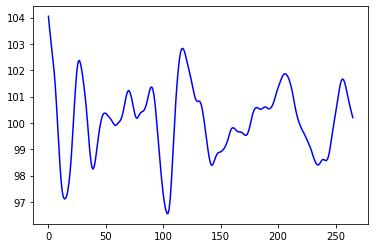

In [82]:
from matplotlib import pyplot as plt
import numpy as np


fig, ax1 = plt.subplots()
ax1.plot
# line plot
ax1.plot(경기4국면.index, 경기4국면['CLI'], color='blue')

#ax1.scatter(df_momentum[둔감].index, df_momentum[둔감]['한국cli'], color='green')
ax1.scatter(경기4국면['거래일'].index, 경기4국면[['확장']==1], color='red')
#ax1.scatter(df_momentum[위축].index, df_momentum[위축]['한국cli'], color='gray')
#ax1.scatter(df_momentum[회복].index, df_momentum[회복]['한국cli'], color='deeppink')
ax2 = ax1.twinx()
# ax2.plot(df_momentum.index, df_momentum['기준금리'], color='black')


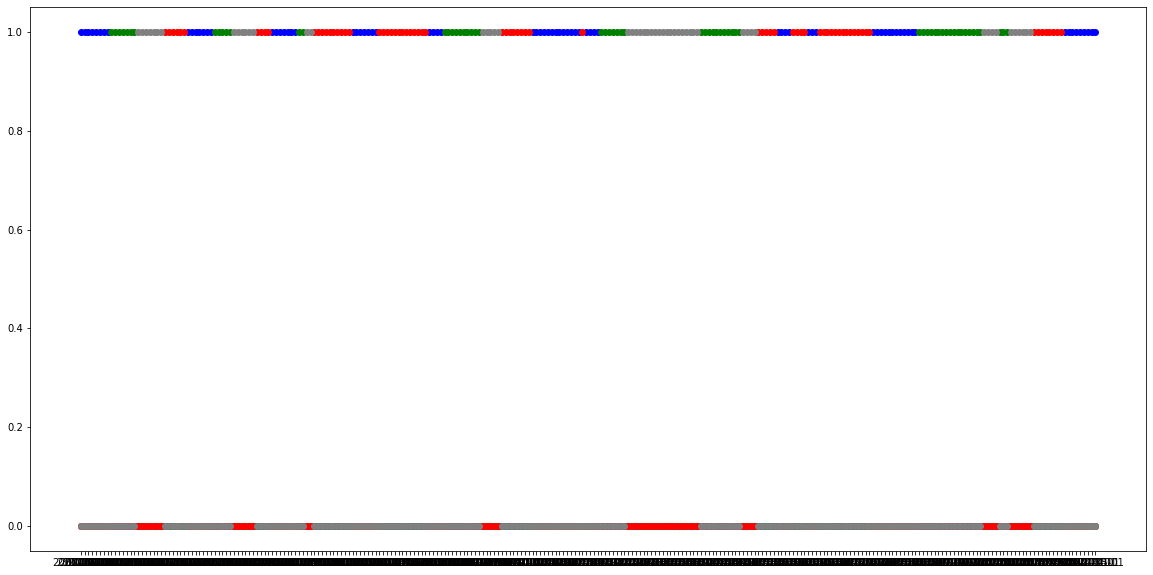

<Figure size 1440x720 with 0 Axes>

In [90]:
from matplotlib import pyplot as plt
import numpy as np


fig, ax1 = plt.subplots(figsize=(20,10))
plt.figure(figsize=(20,10))
ax1.plot
# line plot
ax1.scatter(경기4국면['거래일'].tolist(), 경기4국면['둔감'], color='blue')
ax1.scatter(경기4국면['거래일'].tolist(), 경기4국면['위축'], color='green')
ax1.scatter(경기4국면['거래일'].tolist(), 경기4국면['확장'], color='red')
ax1.scatter(경기4국면['거래일'].tolist(), 경기4국면['회복'], color='gray')
#ax1.scatter(df_momentum[회복].index, df_momentum[회복]['한국cli'], color='deeppink')
# ax2 = ax1.twinx()
# ax2.plot(경기4국면['거래일'], 경기4국면['기준금리'], color='black')
